In [6]:
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
# from utils import get_cntr, euclidean_distance

from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
label_files[0],image_files[0]

('./data2/label\\AI_XING_CHI_MR711087_664684831_2202.nii.gz',
 './data2/img\\AI_XING_CHI_MR711087_664684831_2202_0000.nii.gz')

In [7]:
from common.axial_stand import AxialStand
axial_stand = AxialStand(image_files[0],label_files[0],"RAI")

In [8]:
axial_stand.axcodes 

'RAI'

In [9]:
img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(image_files[0],label_files[0],"RAI")
img_info

{'size': (320, 320, 22),
 'origin': (110.78244018554688, 180.6864471435547, 15.863840579986572),
 'spacing': (0.9375, 0.9375, 4.000000476837158),
 'origin_direction': (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0)}

In [12]:
head_line = axial_stand.get_fitline_2d_skeletonize(msk_array, 'HC')
brain_line = axial_stand.get_fitline_2d_skeletonize(msk_array, 'BA')
# csp_line = axial_stand.get_fitline_2d_skeletonize(msk_array, 'CSP')
# line_list = [head_line, brain_line, csp_line]
line_list = [head_line, brain_line]

In [13]:
line_list

[[-0.043657203205566264, 202.98499720444804],
 [0.03973602606534226, 192.68817342018167]]

In [8]:
ad_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'AD')

In [10]:
ad_slice.shape,type(ad_slice)

((320, 320), numpy.ndarray)

In [11]:
ad_counters,_ = cv2.findContours(ad_slice, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [13]:
# ad_slice = axial_stand.get_refer_max_slice(msk_array, 'AD')
ad_counters,_ = cv2.findContours(ad_slice, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
assert len(ad_counters) == 2, 'In max area slice of ad, there are more than two contours'
# 获取左右侧脑室的中点
ad_cntr0 = get_cntr(ad_counters[0])
ad_cntr1 = get_cntr(ad_counters[1])
ad_cntr0,ad_cntr1

((133, 215), (128, 181))

In [14]:
abs(euclidean_distance(head_line[0], head_line[1], ad_cntr0) - euclidean_distance(head_line[0], head_line[1], ad_cntr1))

14.606688324872104

In [15]:
euclidean_distance(head_line[0], head_line[1], ad_cntr0)

24.007176207991076

In [17]:
head_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'HC')
brain_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'BA')
csp_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'CSP')

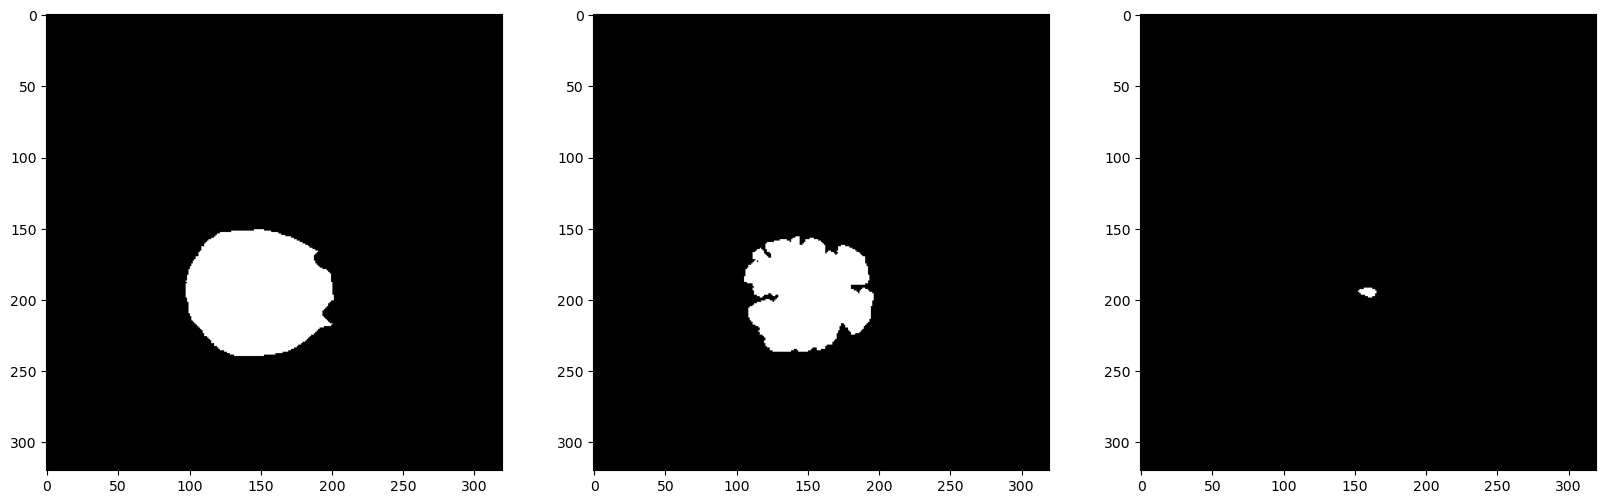

In [21]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 20))

ax1.imshow(head_slice, cmap="gray")
ax2.imshow(brain_slice, cmap="gray")
ax3.imshow(csp_slice, cmap="gray")
# ax3.imshow(img_3, cmap="gray")

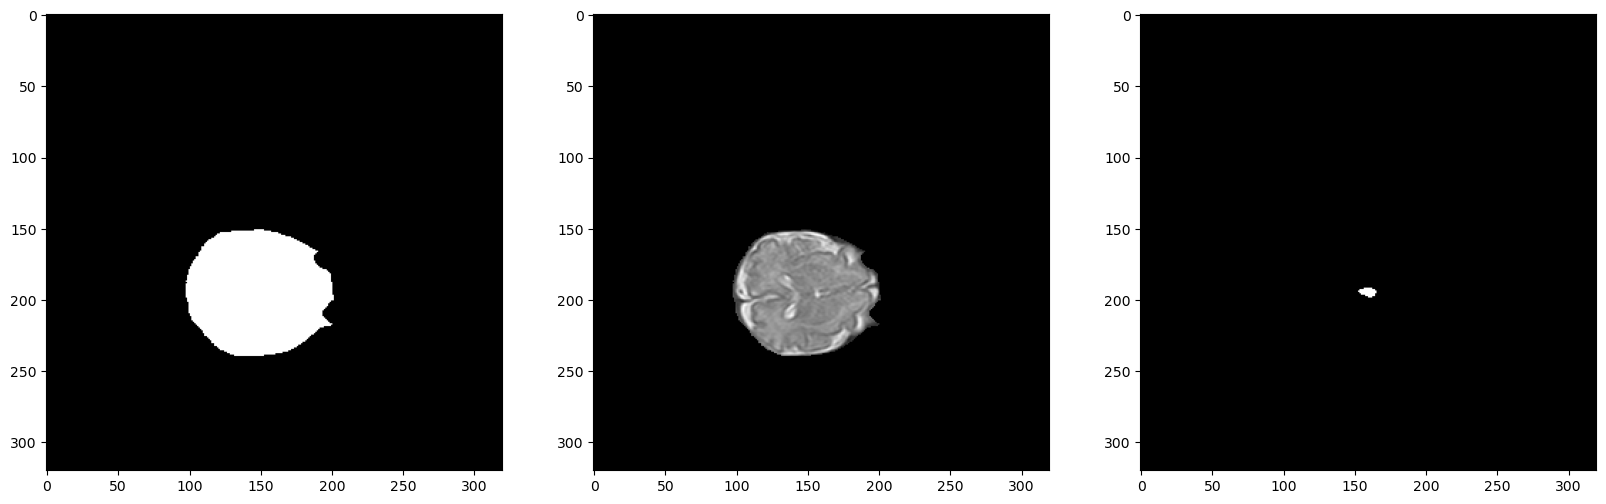

In [23]:
head_slice_masked = axial_stand.get_masked_slice(img_norm_arr,msk_array, 'HC')
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 20))

ax1.imshow(head_slice, cmap="gray")
ax2.imshow(head_slice_masked, cmap="gray")
ax3.imshow(csp_slice, cmap="gray")
# ax3.imshow(img_3, cmap="gray")

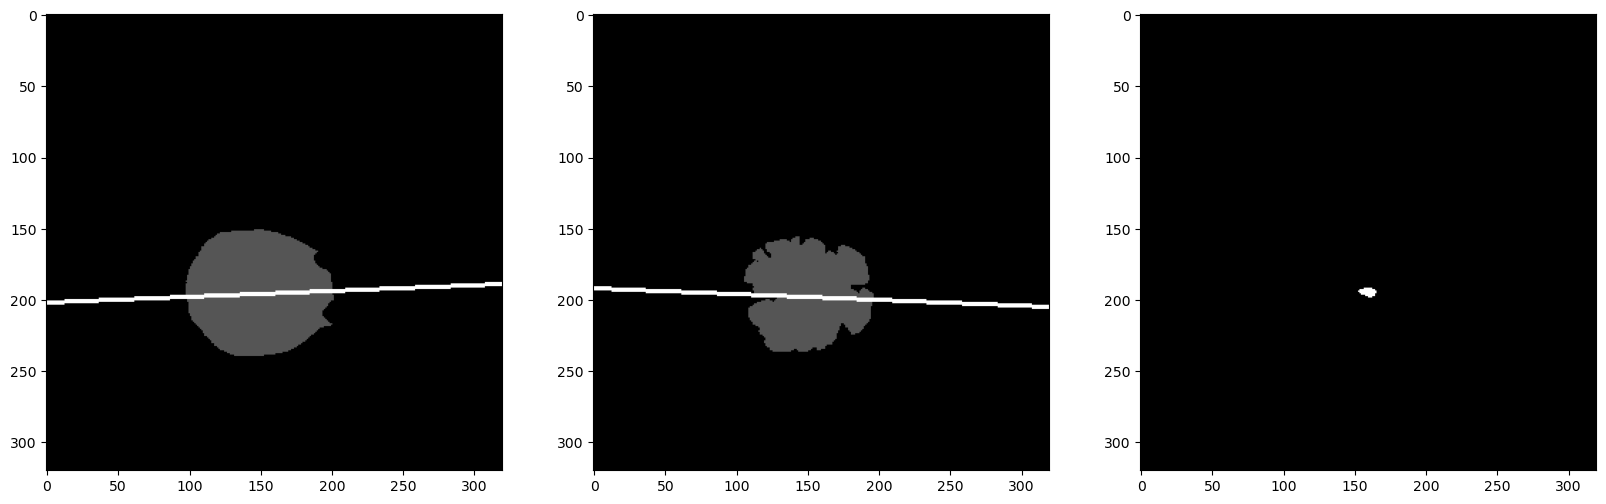

In [16]:
import matplotlib.pyplot as plt
head_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'HC')
brain_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'BA')
csp_slice,_ = axial_stand.get_refer_max_slice(msk_array, 'CSP')

y1 = line_list[0][0]*0+line_list[0][1]
y2 = line_list[0][0]*320+line_list[0][1]
cv2.line(head_slice,(0,int(y1)),(320,int(y2)),3,2)

y1 = line_list[1][0]*0+line_list[1][1]
y2 = line_list[1][0]*320+line_list[1][1]
cv2.line(brain_slice,(0,int(y1)),(320,int(y2)),3,2)

# y1 = line_list[2][0]*0+line_list[2][1]
# y2 = line_list[2][0]*320+line_list[2][1]
# cv2.line(csp_slice,(0,int(y1)),(320,int(y2)),3,2)

# cv2.line(head_slice,(int(y1),int(0)),(int(y2),int(0)),1,1)
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 20))

ax1.imshow(head_slice, cmap="gray")
ax2.imshow(brain_slice, cmap="gray")
ax3.imshow(csp_slice, cmap="gray")
# ax3.imshow(img_3, cmap="gray")
                     

In [27]:
y1,y2

(178.80247248645514, 207.89443061070074)

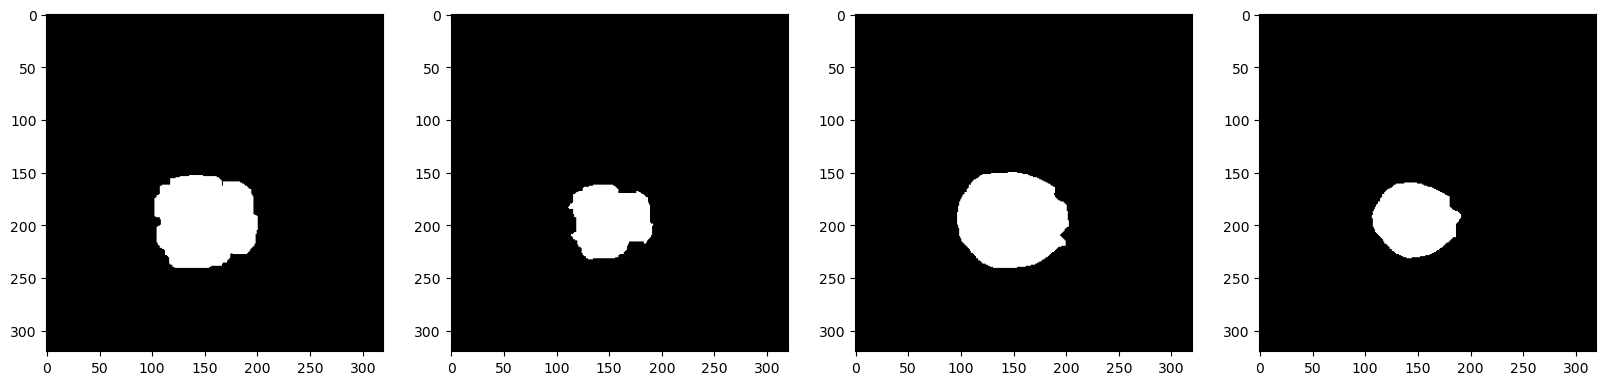

In [38]:

from sklearn.linear_model import LinearRegression
liner = LinearRegression()
msk_slice_BA, _ = axial_stand.get_refer_max_slice(msk_array, 'BA')
msk_slice_HC, _ = axial_stand.get_refer_max_slice(msk_array, 'HC')
msk_slice_CSP, _ = axial_stand.get_refer_max_slice(msk_array, 'CSP')
# # 过小图像不进行处理
# if DoMorphology:
#     # 设置卷积核
kernel = np.ones((5,5), np.uint8)

erosion_BA_1 = cv2.erode(msk_slice_BA, kernel, iterations=1)
msk_slice_BA_1 = cv2.dilate(erosion_BA_1, kernel, iterations=3)

msk_slice_BA_2 = cv2.dilate(msk_slice_BA, kernel, iterations=1)
erosion_BA_2 = cv2.erode(msk_slice_BA_2, kernel, iterations=3)

# erosion_HC_1 = cv2.erode(msk_slice_HC, kernel, iterations=1)
msk_slice_HC_1 = cv2.dilate(erosion_HC_1, kernel, iterations=1)

msk_slice_HC_2 = cv2.dilate(msk_slice_HC, kernel, iterations=1)
erosion_HC_2 = cv2.erode(msk_slice_HC_2, kernel, iterations=5)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(msk_slice_BA_1, cmap="gray")
ax2.imshow(erosion_BA_2, cmap="gray")
ax3.imshow(msk_slice_HC_1, cmap="gray")
ax4.imshow(erosion_HC_2, cmap="gray")


# # 骨架提取


# msk_slice_sk = skeletonize(msk_slice)
# row, col = np.nonzero(msk_slice_sk)
# liner.fit(col.reshape(-1, 1), row)
# # 获取线性拟合的斜率和截距
# w = float(liner.coef_[0])
# b = float(liner.intercept_)

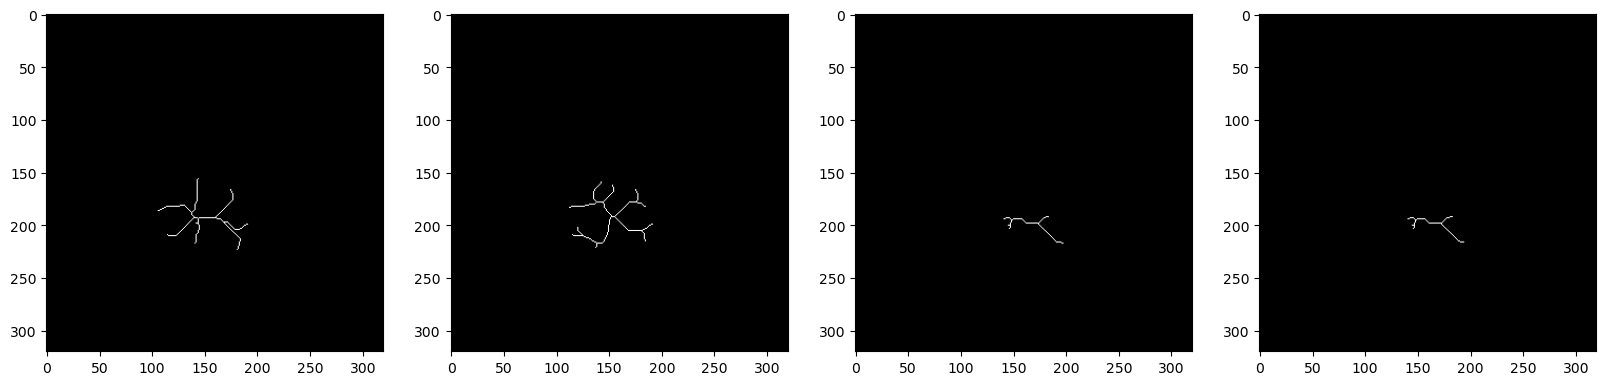

In [19]:
msk_slice_sk1 = skeletonize(msk_slice_BA_1)
msk_slice_sk2 = skeletonize(erosion_BA_2)
msk_slice_sk3 = skeletonize(msk_slice_HC_1)
msk_slice_sk4 = skeletonize(erosion_HC_2)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(msk_slice_sk1, cmap="gray")
ax2.imshow(msk_slice_sk2, cmap="gray")
ax3.imshow(msk_slice_sk3, cmap="gray")
ax4.imshow(msk_slice_sk4, cmap="gray")

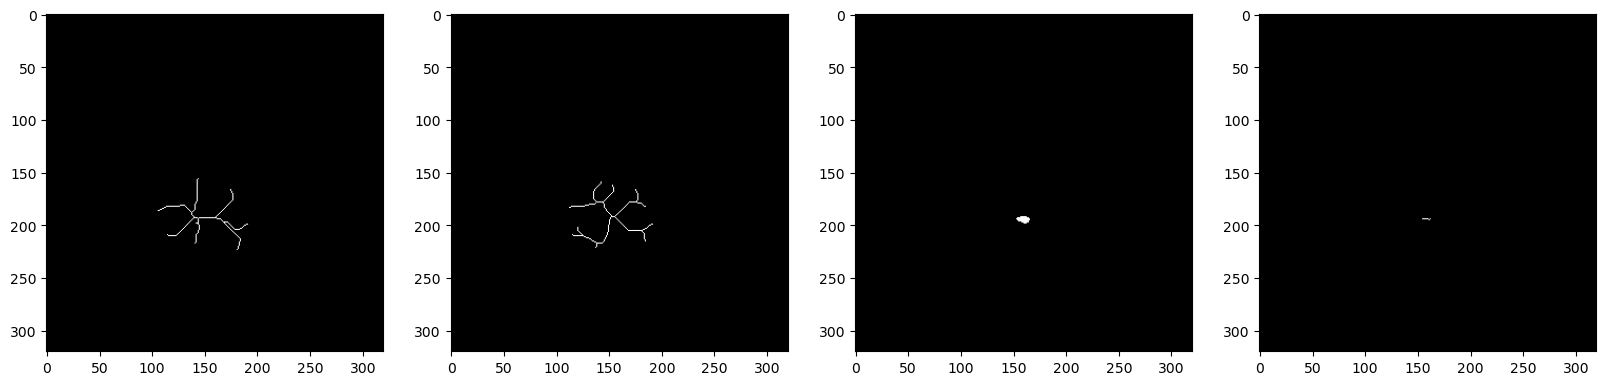

In [20]:
msk_slice_sk_csp = skeletonize(msk_slice_CSP)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(msk_slice_sk1, cmap="gray")
ax2.imshow(msk_slice_sk2, cmap="gray")
ax3.imshow(msk_slice_CSP, cmap="gray")
ax4.imshow(msk_slice_sk_csp, cmap="gray")

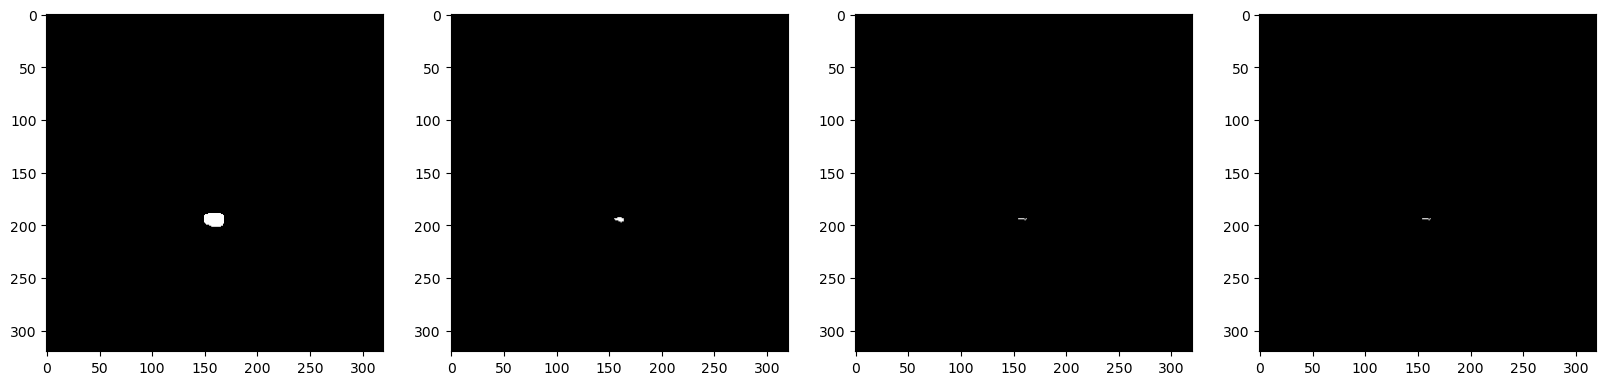

In [34]:
kernel = np.ones((3, 3), np.uint8)

# erosion_CSP_1 = cv2.erode(msk_slice_CSP, kernel, iterations=1)
msk_slice_CSP_1 = cv2.dilate(msk_slice_CSP, kernel, iterations=3)

msk_slice_CSP_2 = cv2.dilate(msk_slice_CSP, kernel, iterations=1)
erosion_CSP_2 = cv2.erode(msk_slice_CSP_2, kernel, iterations=2)

msk_slice_sk_csp1 = skeletonize(msk_slice_CSP_1)
msk_slice_sk_csp2 = skeletonize(erosion_CSP_2)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(msk_slice_CSP_1, cmap="gray")
ax2.imshow(erosion_CSP_2, cmap="gray")
ax3.imshow(msk_slice_sk_csp1, cmap="gray")
ax4.imshow(msk_slice_sk_csp2, cmap="gray")

In [1]:
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
# from utils import get_cntr, euclidean_distance

from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
label_files[0],image_files[0]

from common.axial_stand import AxialStand
axial_stand = AxialStand(image_files[0],label_files[0],"RAI")
img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(image_files[0],label_files[0],"RAI")
img_info

{'size': (320, 320, 22),
 'org_origin': (-188.28005981445312, -118.37605285644531, -68.13616943359375),
 'origin': (110.78244018554688, 180.6864471435547, 15.863840579986572),
 'spacing': (0.9375, 0.9375, 4.000000476837158),
 'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)}

In [2]:
angle_hc_ep, angle_csp_ep, fitline_angle, rot_slice_ep_csp, rot_slice_ep_hc, rot_slice_fitline, cntr_csp_ep, cntr_hc_ep, cntr_fitline = axial_stand.get_angle_2D_multi_cosine(img_norm_arr, msk_array)

max_area_idx_hc: 15 max_area_idx_csp: 17


In [3]:
angle_hc_ep, angle_csp_ep, fitline_angle

(96.5309066772461, 95.36071014404297, 3.40644375499472)

In [4]:
rot_slice_ep_csp.shape

(320, 320)

max_area_idx_hc: 15 max_area_idx_csp: 17


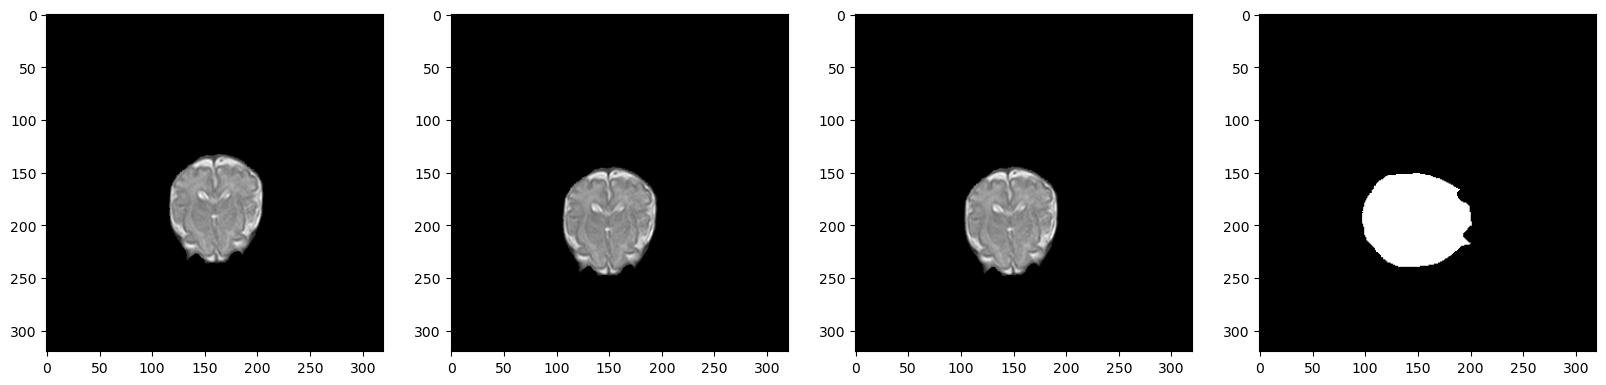

In [5]:
import matplotlib.pyplot as plt
hc_slice_id, csp_slice_id = axial_stand.get_sliceID_contains_label(msk_array)
hc_slice = axial_stand.get_refer_slice(msk_array, 'HC', hc_slice_id)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(rot_slice_ep_csp, cmap="gray")
ax2.imshow(rot_slice_ep_hc, cmap="gray")
ax3.imshow(rot_slice_fitline, cmap="gray")
ax4.imshow(hc_slice, cmap="gray")

In [3]:
cntr_csp_ep, cntr_hc_ep, cntr_fitline

([160, 195], [149, 196], [148, 195])

In [4]:
test1 = rot_slice_ep_csp[cntr_csp_ep[1],:]
width = [np.min(np.nonzero(test1)),np.max(np.nonzero(test1))]
width

[117, 204]

In [5]:
width_half = max([abs(cntr_csp_ep[0] - np.min(np.nonzero(test1))), abs(cntr_csp_ep[0] - np.max(np.nonzero(test1)))])
width_half

44

In [6]:
test2 = rot_slice_ep_csp[:,cntr_csp_ep[0]]
height = [np.min(np.nonzero(test2)),np.max(np.nonzero(test2))]
height_half = max([abs(cntr_csp_ep[1] - np.min(np.nonzero(test2))), abs(cntr_csp_ep[1] - np.max(np.nonzero(test2)))])
height_half,height

(62, [133, 236])

In [7]:
cntr_csp_ep[1]-height_half,cntr_csp_ep[1]+height_half

(133, 257)

In [8]:
cut = rot_slice_ep_csp[cntr_csp_ep[1]-height_half:cntr_csp_ep[1]+height_half,cntr_csp_ep[0]-width_half:cntr_csp_ep[0]+width_half]
# cut = rot_slice_ep_csp[133:257,:]
cut.shape

(124, 88)

max_area_idx_hc: 15 max_area_idx_csp: 17


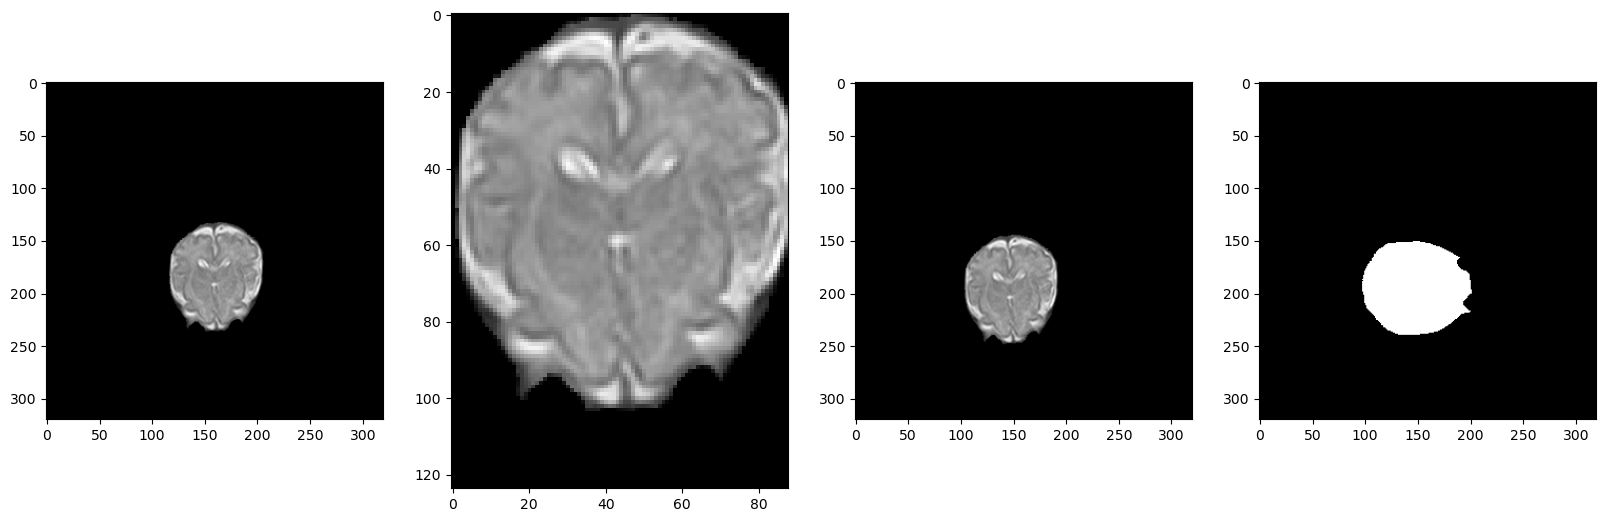

In [9]:
import matplotlib.pyplot as plt
hc_slice_id, csp_slice_id = axial_stand.get_sliceID_contains_label(msk_array)
hc_slice = axial_stand.get_refer_slice(msk_array, 'HC', hc_slice_id)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(rot_slice_ep_csp, cmap="gray")
ax2.imshow(cut, cmap="gray")
ax3.imshow(rot_slice_fitline, cmap="gray")
ax4.imshow(hc_slice, cmap="gray")

In [10]:
cut.shape

(124, 88)

In [11]:
from math import ceil
cut0 =cut[:,0:ceil(cut.shape[1]/2)]
cut1 =cut[:,ceil(cut.shape[1]/2):cut.shape[1]]
cut2 = np.flip(cut1,axis=1)

max_area_idx_hc: 15 max_area_idx_csp: 17


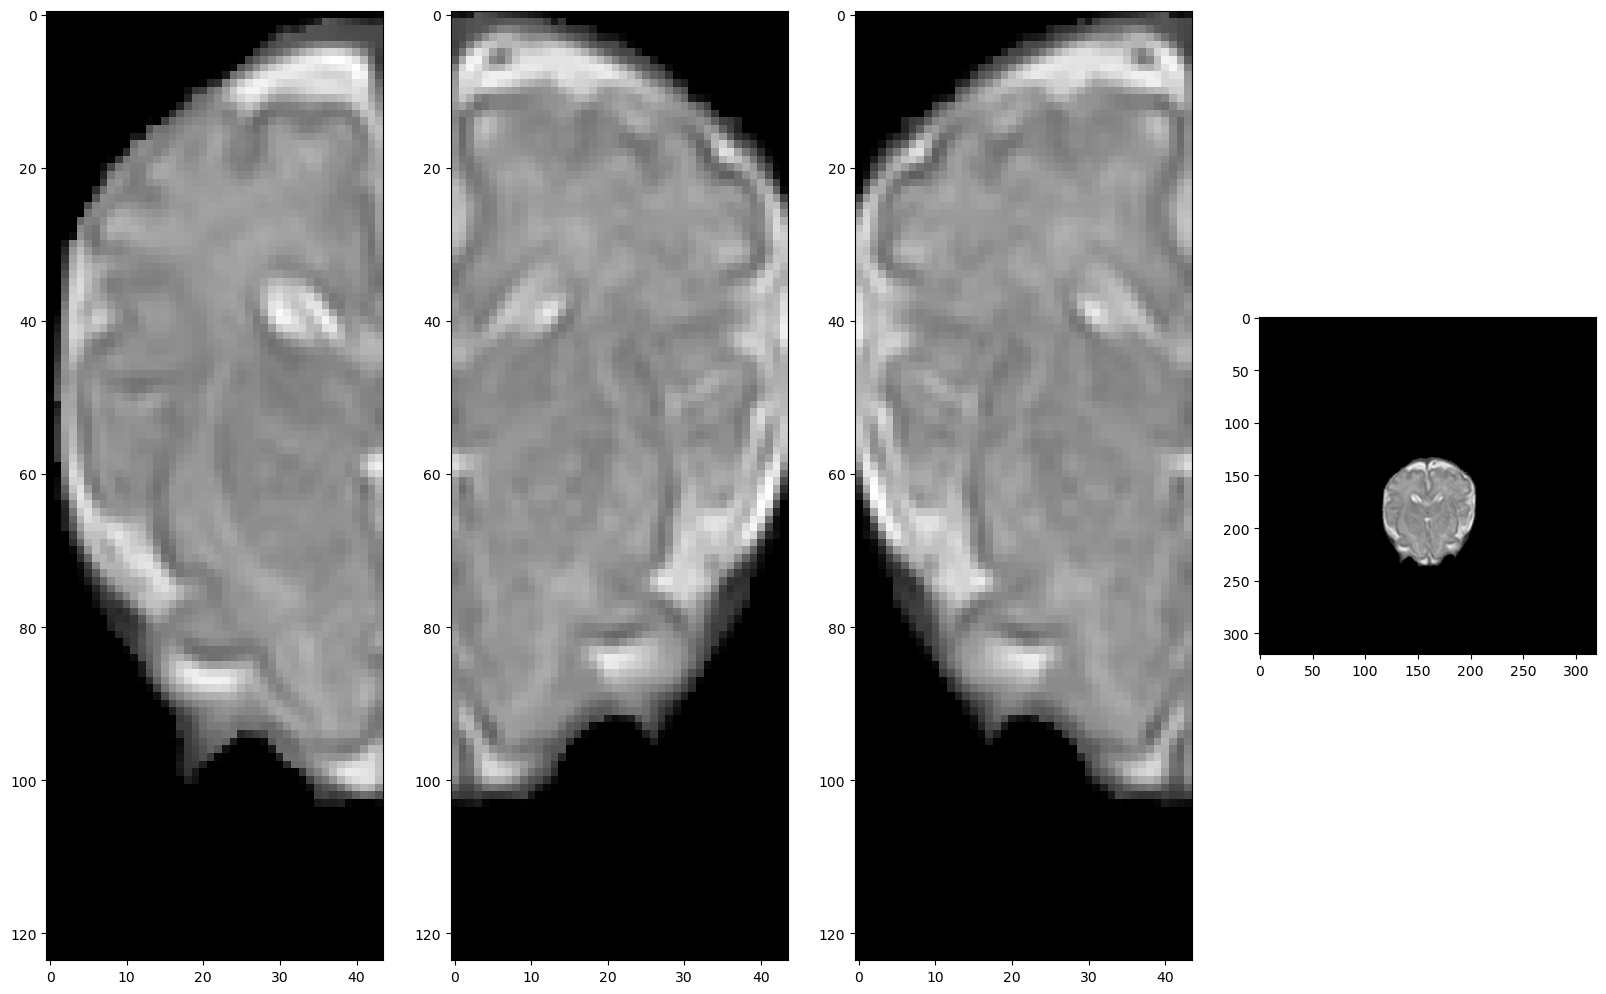

In [12]:
import matplotlib.pyplot as plt
hc_slice_id, csp_slice_id = axial_stand.get_sliceID_contains_label(msk_array)
hc_slice = axial_stand.get_refer_slice(msk_array, 'HC', hc_slice_id)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 20))

ax1.imshow(cut0, cmap="gray")
ax2.imshow(cut1, cmap="gray")
ax3.imshow(cut2, cmap="gray")
ax4.imshow(rot_slice_ep_csp, cmap="gray")

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(cut0.reshape(1, -1), cut2.reshape(1, -1))

In [14]:
cos_sim[0][0]

0.9489037053874434

In [24]:
from skimage.metrics import structural_similarity
ssim= structural_similarity(cut0, cut2)
ssim

0.5803852528637782

In [18]:
cut0.shape,cut2.shape

((124, 44), (124, 44))

In [20]:
np.reshape(cut0,-1).shape

(5456,)

In [22]:
from sklearn import metrics as mr
mutual_infor = mr.mutual_info_score(np.reshape(cut0,-1), np.reshape(cut0,-1))
mutual_infor

3.5500594051555305

In [25]:
cos_sim

array([[0.94890371]])

In [1]:
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
# from utils import get_cntr, euclidean_distance

from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
label_files[0],image_files[0]

from common.axial_stand import AxialStand
axial_stand = AxialStand(image_files[0],label_files[0],"RAI")
img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(image_files[0],label_files[0],"RAI")

In [2]:
cut_img, cos_list, ssim_list, mr_list = axial_stand.get_angle_2D_multi_cosine(img_norm_arr, msk_array)

max_area_idx_hc: 15 max_area_idx_csp: 17


In [3]:
cos_list, ssim_list, mr_list 

([array([[0.94890371]]), array([[0.947958]]), array([[0.9617696]])],
 [0.5803852528637782, 0.554121514450975, 0.4055217577585941],
 [1.4040208190989292, 1.4460673183466397, 1.467908873747278])

In [4]:
cut_img[0][0]

array([[ 0,  0,  0, ...,  0,  0,  5],
       [ 0,  0,  0, ..., 35, 28, 33],
       [ 0,  0,  0, ..., 58, 59, 58],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

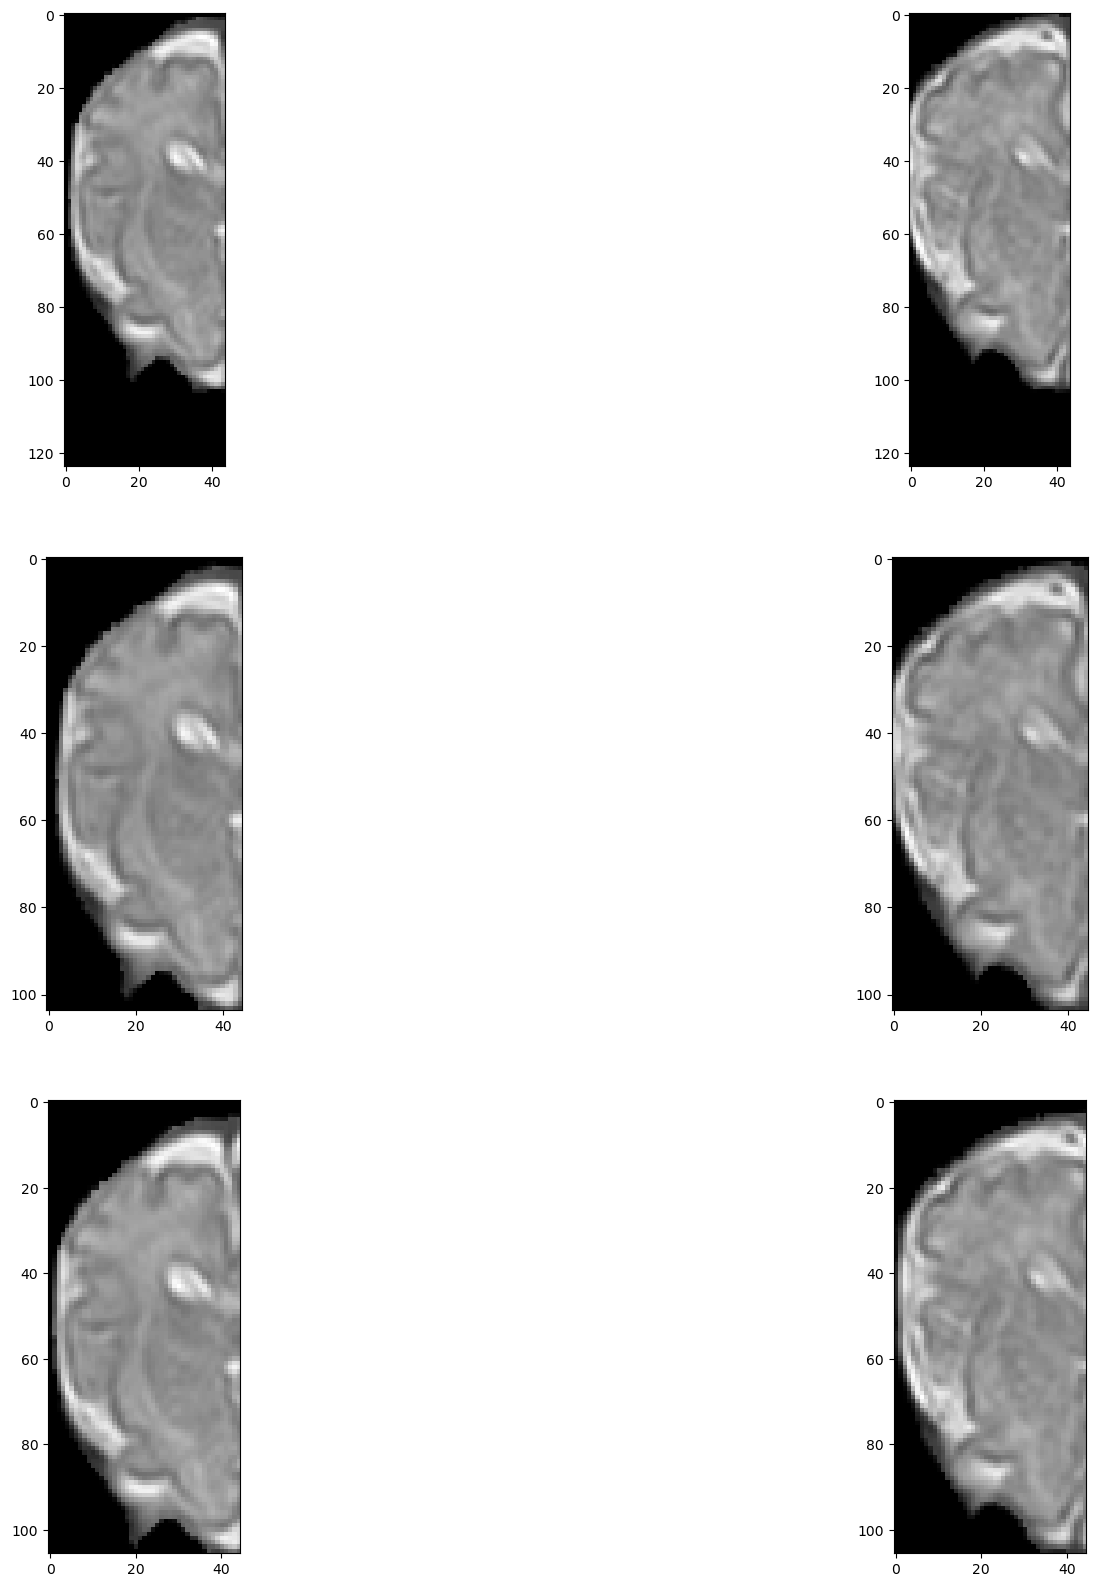

In [5]:
import matplotlib.pyplot as plt
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 20))

ax1.imshow(cut_img[0][0], cmap="gray")
ax2.imshow(cut_img[0][1], cmap="gray")
ax3.imshow(cut_img[1][0], cmap="gray")
ax4.imshow(cut_img[1][1], cmap="gray")
ax5.imshow(cut_img[2][0], cmap="gray")
ax6.imshow(cut_img[2][1], cmap="gray")

In [11]:
mr_list.index(max(mr_list))

2

In [10]:
from scipy.ndimage import binary_erosion
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)

from common.axial_stand import AxialStand
axial_stand = AxialStand(image_files[0],label_files[0],"RAI")
img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(image_files[0],label_files[0],"RAI")

In [5]:
ad_array = np.where(msk_array == 3, 1, 0)
np.sum(ad_array, axis=(0, 1))

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 175,
       165, 161,   0,   0,   0,   0,   0,   0,   0])

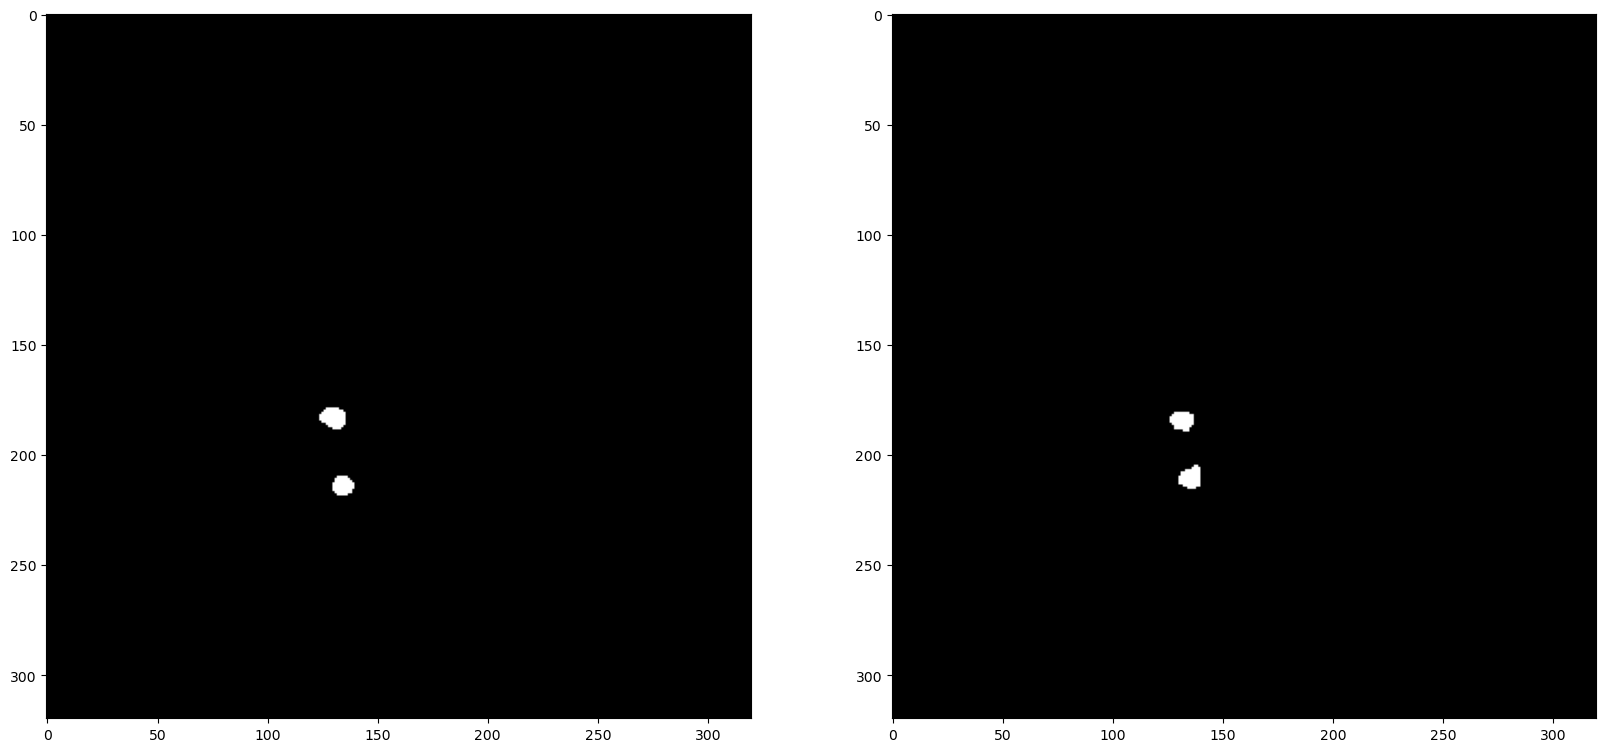

In [6]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(ad_array[:,:,13], cmap="gray")
ax2.imshow(ad_array[:,:,14], cmap="gray")


In [11]:
test_list = image_files[0:20]
len(test_list),test_list

(20,
 ['./data2/img\\AI_XING_CHI_MR711087_664684831_2202_0000.nii.gz',
  './data2/img\\BIAN_RUO_YUN_MR718444_82040_9_0000.nii.gz',
  './data2/img\\CAO_CHUN_MR679638_04333_702_0000.nii.gz',
  './data2/img\\CAO_LIU_QING_MR714037_4771_701_0000.nii.gz',
  './data2/img\\CAO_MEI_MR716800_5613_601_0000.nii.gz',
  './data2/img\\CAO_QIN_MR716472_662437026_902_0000.nii.gz',
  './data2/img\\CAO_WEN_MR719506_662792937_2802_0000.nii.gz',
  './data2/img\\CAO_YAN_YING_MR722791_7559_1401_0000.nii.gz',
  './data2/img\\CAO_YU_MR720366_6826_1001_0000.nii.gz',
  './data2/img\\CHEN_CHEN_MR724159_7972_1201_0000.nii.gz',
  './data2/img\\CHEN_HAN_XI_MR720356_6823_3901_0000.nii.gz',
  './data2/img\\CHEN_JIAO_MR718120_6046_501_0000.nii.gz',
  './data2/img\\CHEN_JIE_MR721709_7221_801_0000.nii.gz',
  './data2/img\\CHEN_JUAN_MR734913_11305_3301_0000.nii.gz',
  './data2/img\\CHEN_LI_HUI_MR679911_45932_1502_0000.nii.gz',
  './data2/img\\CHEN_LI_MEI_MR717098_5717_1501_0000.nii.gz',
  './data2/img\\CHEN_MEI_MR721592_7

In [21]:
ad_list = list()
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
test_label_list = label_files[0:20]
test_image_list = image_files[0:20]


for idx in range(20):
    axial_stand = AxialStand(test_image_list[idx],test_label_list[idx],"RAI")
    img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(test_image_list[idx],test_label_list[idx],"RAI")
    temp = np.where(msk_array == 3, 1, 0)
    ad_list.append(temp)

In [22]:
for i in ad_list:
    print(np.sum(i, axis=(0, 1)))

[  0   0   0   0   0   0   0   0   0   0   0   0 175 165 161   0   0   0
   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0  80 141 182   0   0   0
   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0 182 127   0   0   0   0   0   0
   0]
[  0   0   0   0   0   0   0   0   0   0  71 102   0   0   0   0   0   0
   0   0   0   0   0]
[  0   0   0   0   0   0   0   0 189 201   0   0   0   0   0   0   0   0
   0   0   0   0]
[  0   0   0   0   0   0   0 262 282   0   0   0   0   0   0   0   0   0
   0   0]
[  0   0   0   0   0   0   0   0   0   0 149 128   0   0   0   0   0   0
   0   0]
[  0   0   0   0   0   0   0   0   0   0 141 146 147   0   0   0   0   0
   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0 110 118 123   0   0   0   0
   0   0   0   0]
[  0   0   0   0   0   0   0   0  84 123 109  47   0   0   0   0   0   0
   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0 188 204 150   0   0   0   0   0
   0   0   0   0   0]
[  0   

In [23]:
label_folder='./data2/test_ad/RawData/ALL/labels'
image_folder = './data2/test_ad/RawData/ALL/images'
ad_list2 = list()
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
test_label_list = label_files[0:20]
test_image_list = image_files[0:20]
for idx in range(20):
    axial_stand = AxialStand(test_image_list[idx],test_label_list[idx],"RAI")
    img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(test_image_list[idx],test_label_list[idx],"RAI")
    temp = np.where(msk_array == 1, 1, 0)
    ad_list2.append(temp)

In [24]:
for i in ad_list2:
    print(np.sum(i, axis=(0, 1)))

[  0   0   0   0   0   0   0   0  58 102  93 102 122 122 127 188 360 512
 391 214 141 149 132   0   0   0]
[  0   0   0   0 161 233 294 374 490 613 613 448 244 133 128 137 100 102
  99   0   0   0   0   0]
[  0   0   0   0  14 114 129 145 157 231 227 196 242 387 692 715 509 356
 248 204 155  49   0   0   0   0]
[  0   0   0   0   0   0  55 110 145 154 198 210 219 237 348 640 746 702
 489 388 347 290 201   0   0   0   0]
[  0   0   0   0  41 231 412 663 561 352 202 166 157 128  89  51   0   0
   0   0   0   0   0   0   0]
[  0   0   0   0   0  53  48  59  63  90 119 191 411 421 363 199 172 145
 108   0   0   0   0]
[  0   0 145 238 349 410 394 317 129 123  82  70  59  16   0   0   0   0
   0   0]
[   0    0    0    0  211  514  600  725  741  811 1102 1092  927  704
  264    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0   77  158  247  371  694  964
 1078  979  873  349    0    0    0    0]
[  0   0   0   0   0  36 331 614 674 679 716 554 121 183 162 171  84 

In [29]:
test1=binary_erosion(ad_list2[0], structure=np.ones((3,3,3)))
test_cut = ad_list2[0] - test1

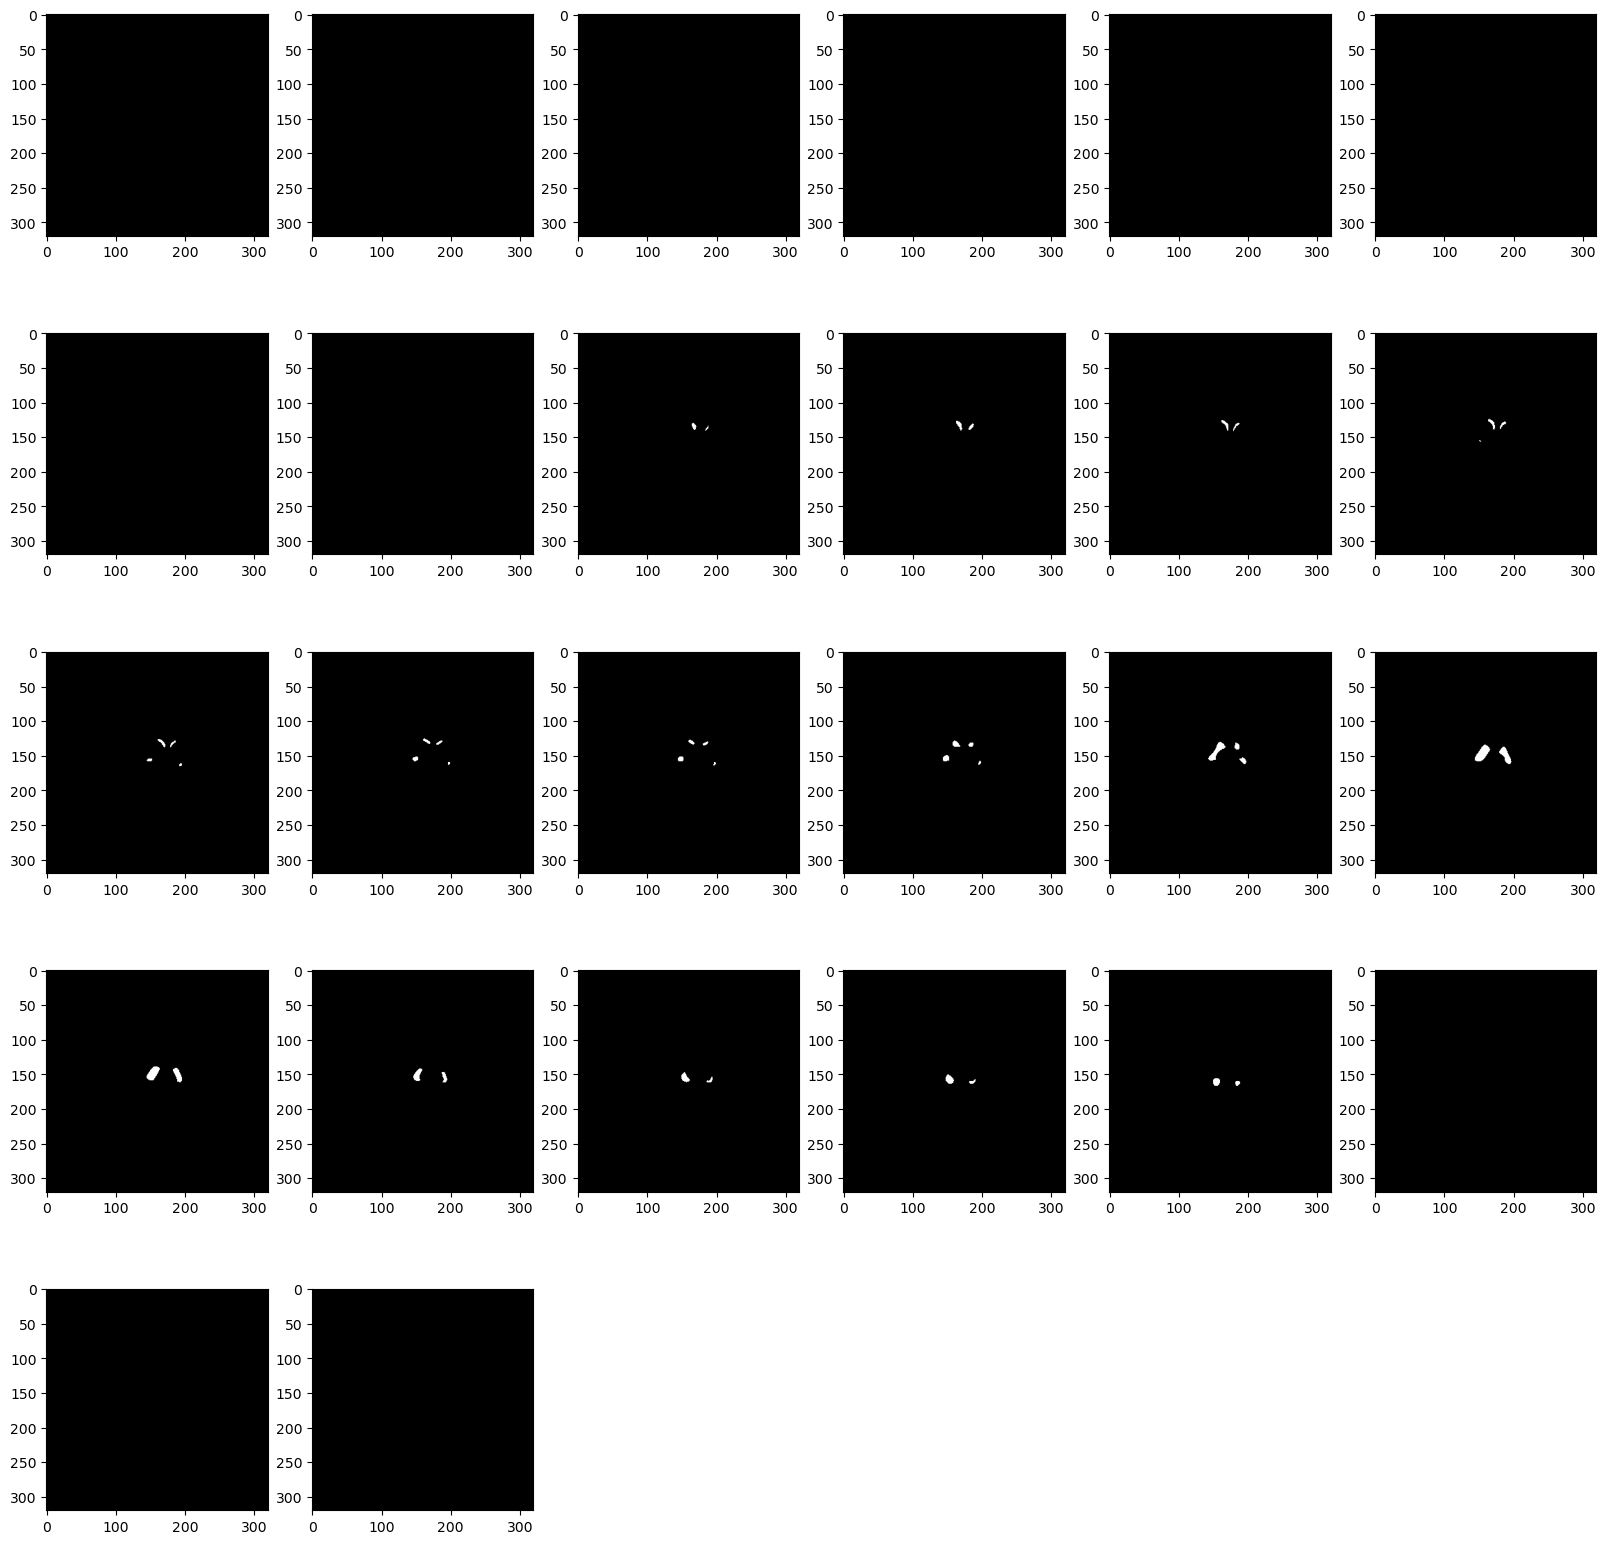

In [30]:
num=1
new_img = ad_list2[0]
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

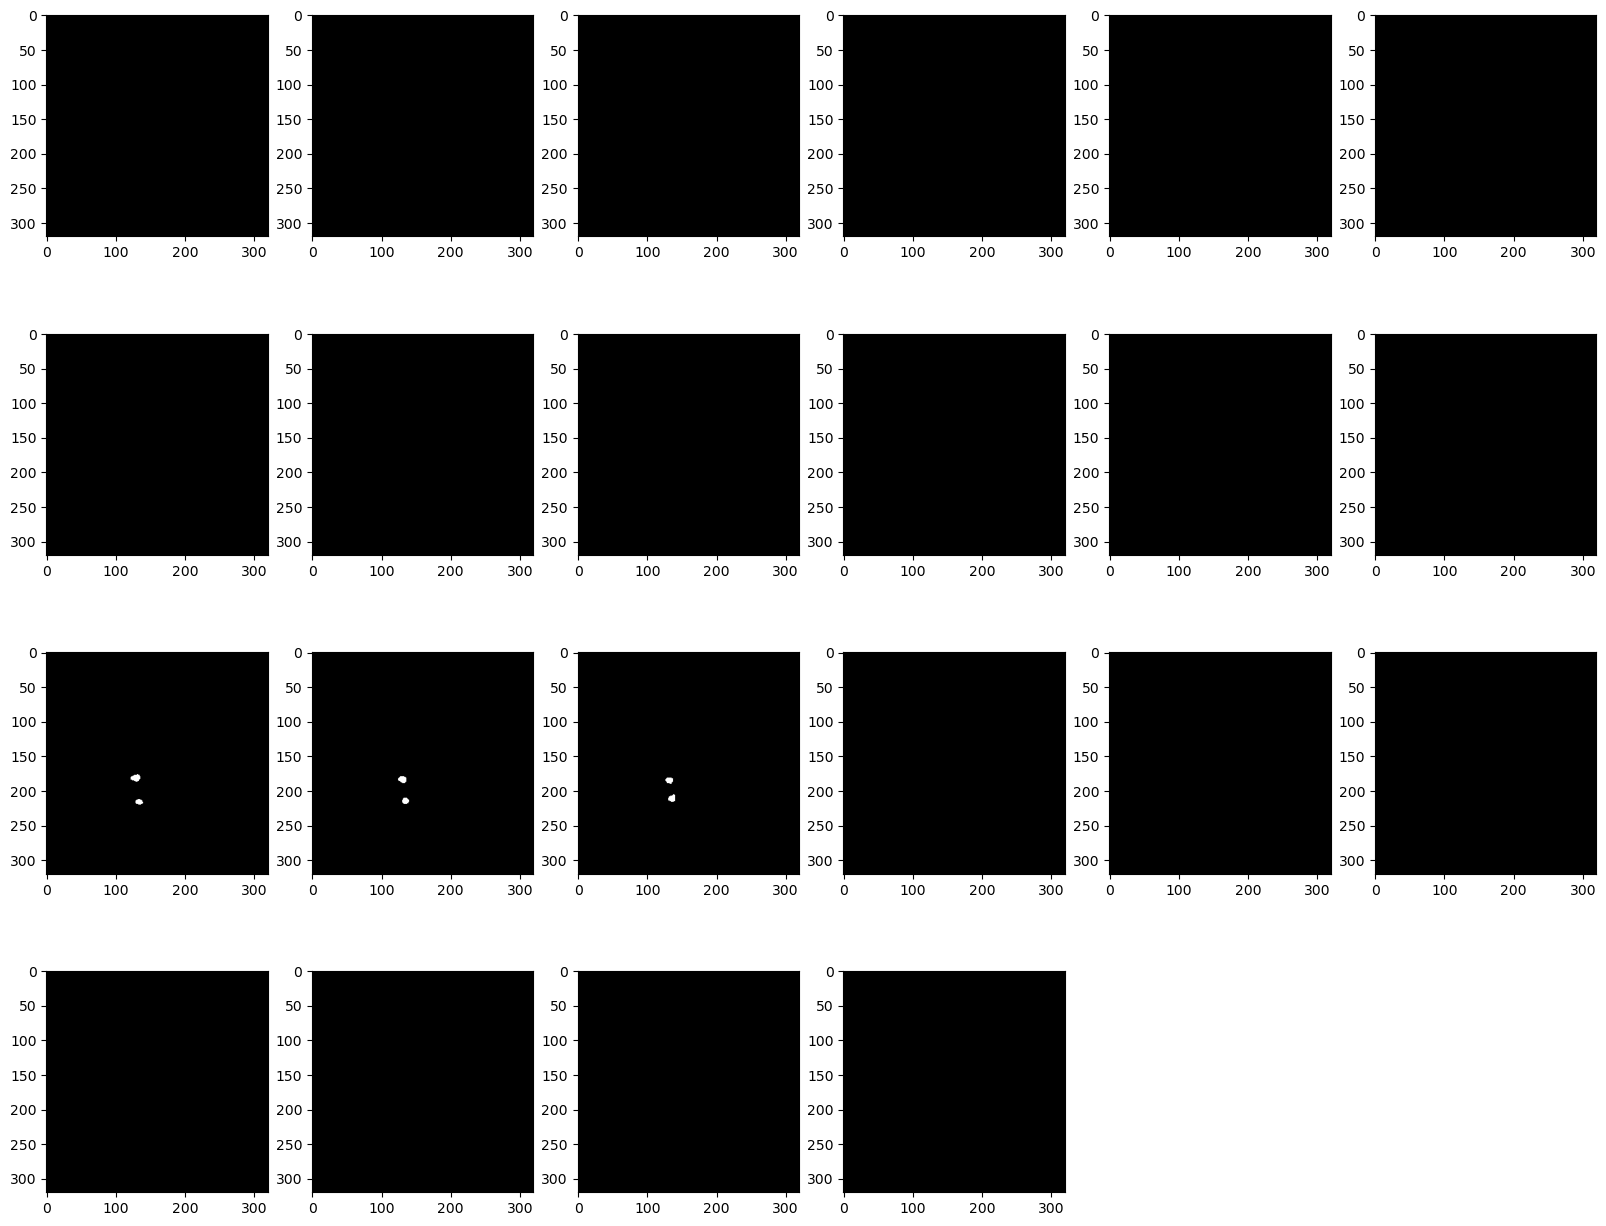

In [32]:
num=1
new_img = ad_list[0]
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

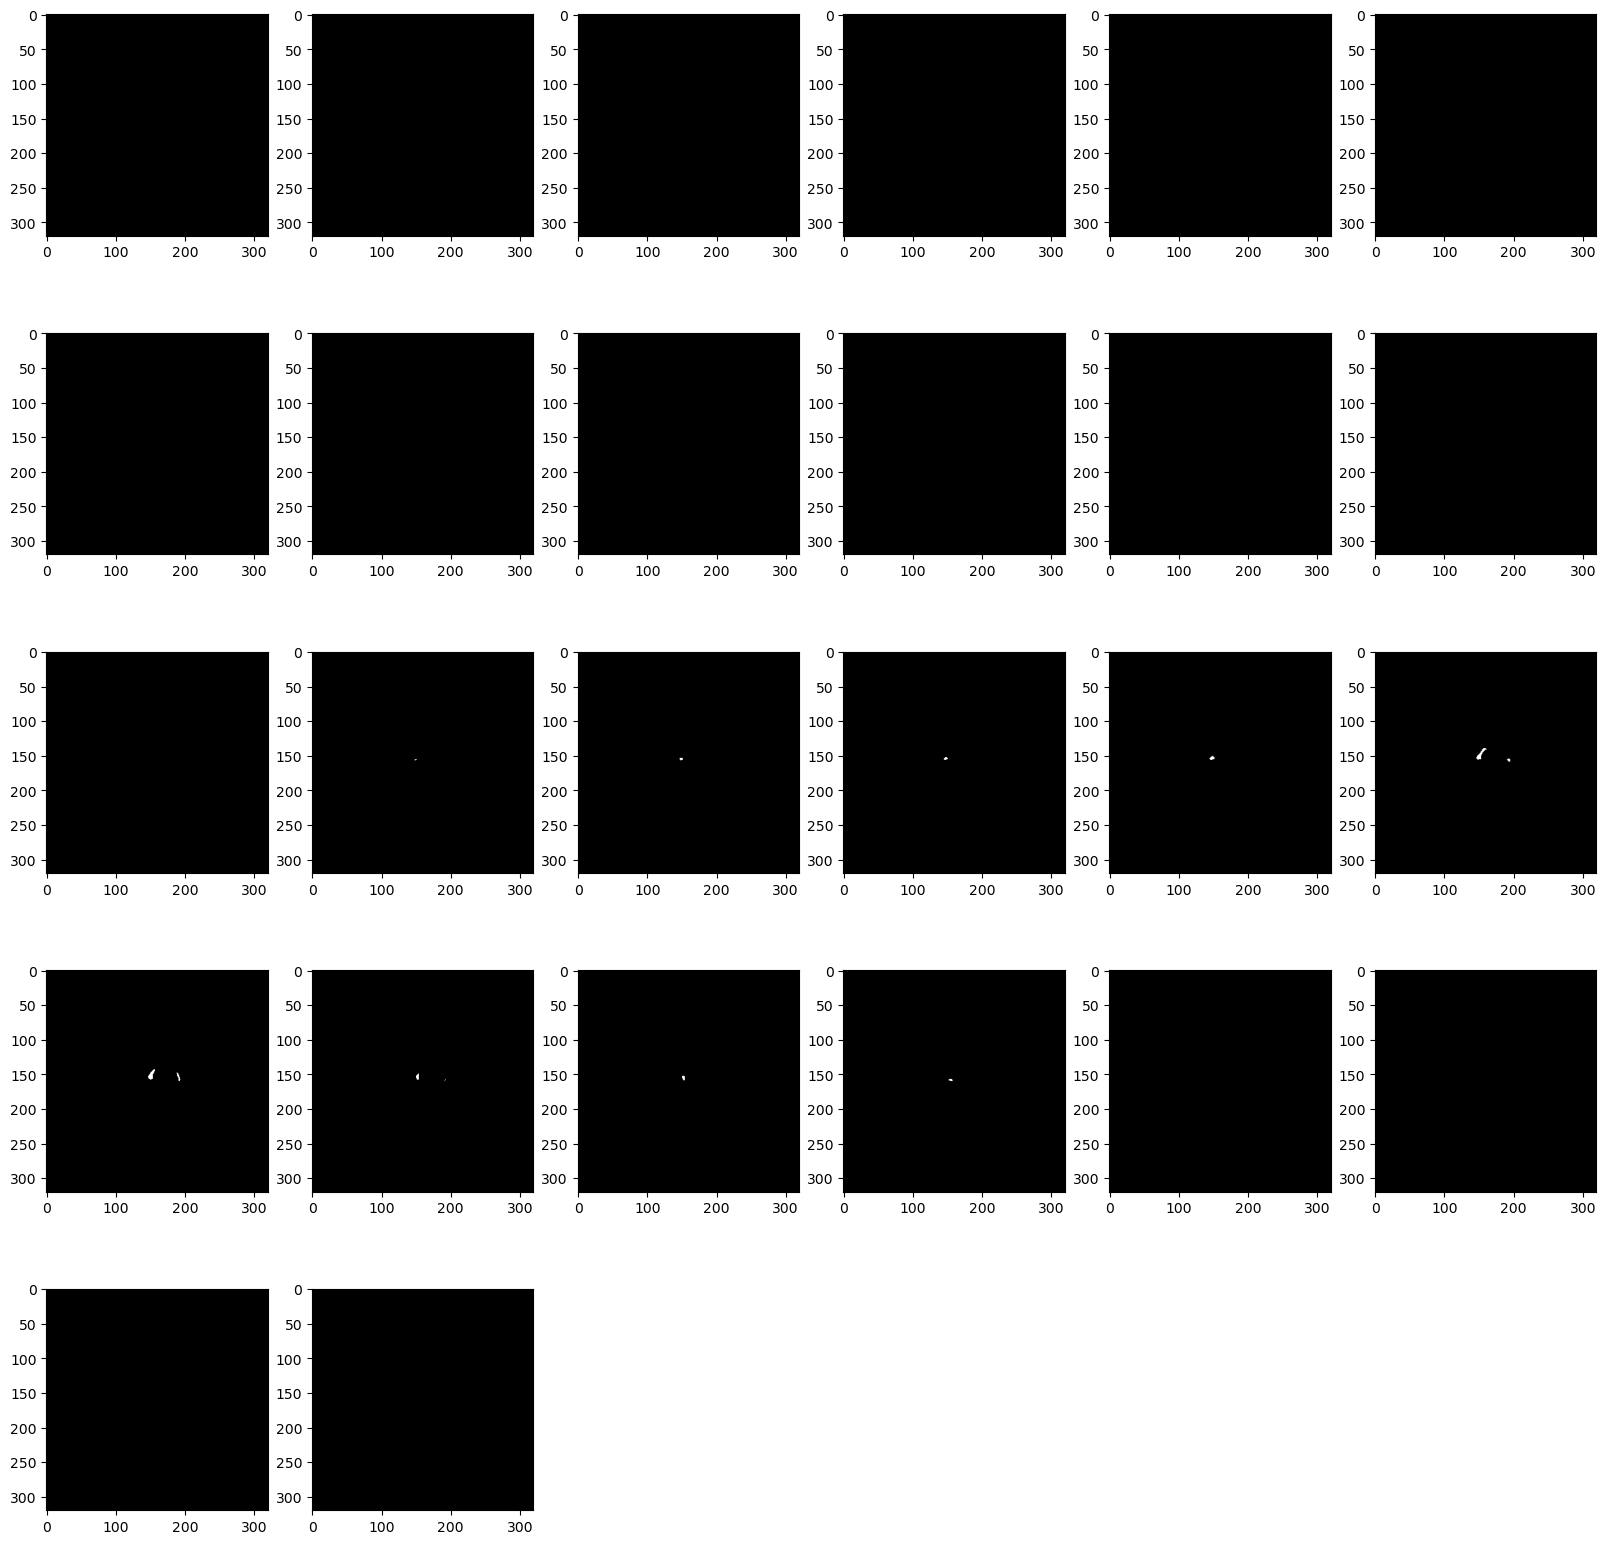

In [31]:
num=1
new_img = test1
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

In [40]:
label_folder='./data2/test_ad/RawData/N/labels'
image_folder = './data2/test_ad/RawData/N/images'
ad_max_list = list()
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
test_label_list = label_files
test_image_list = image_files
for idx in range(len(label_files)):
    axial_stand = AxialStand(test_image_list[idx],test_label_list[idx],"RAI")
    img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(test_image_list[idx],test_label_list[idx],"RAI")
    temp = np.where(msk_array == 1, 1, 0)
    msk_max_id = np.argmax(np.sum(temp, axis=(0, 1)))
    temp_slice = temp[:, :, msk_max_id].astype(np.uint8)
    
    ad_max_list.append(temp_slice)

In [41]:
ad_max_list[0].shape

(320, 320)

ValueError: num must be 1 <= num <= 30, not 31

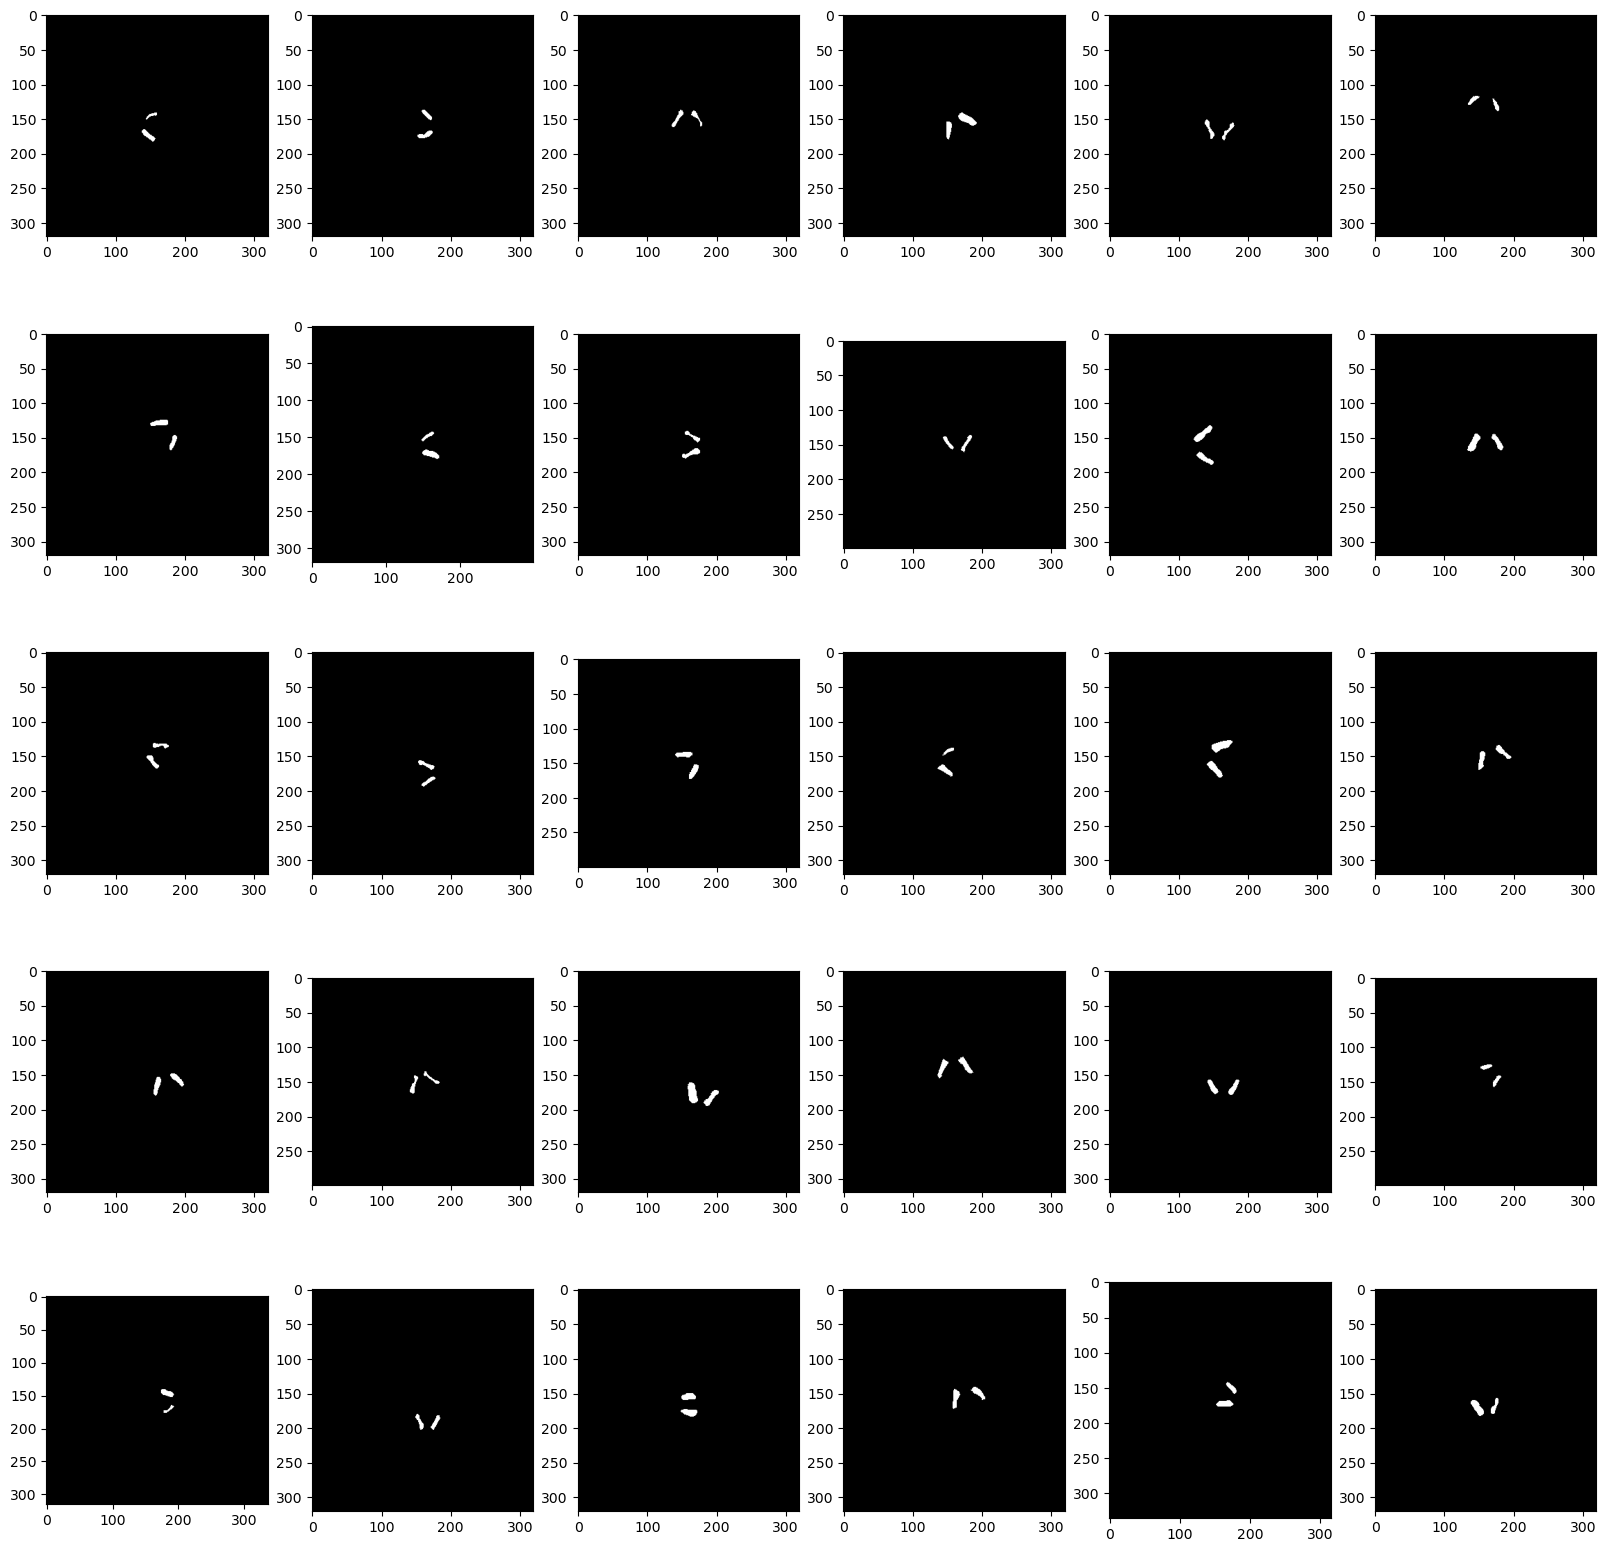

In [43]:
num=1
new_img = test1
plt.rcParams['figure.figsize'] = 20,20
for i in range(len(ad_max_list)):#也可以取10等
    # img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(ad_max_list[i],cmap='gray')
    num+=1
plt.show()

In [38]:
label_folder='./data2/label'
image_folder = './data2/img'
ad_max_list = list()
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
test_label_list = label_files[0:20]
test_image_list = image_files[0:20]
for idx in range(20):
    axial_stand = AxialStand(test_image_list[idx],test_label_list[idx],"RAI")
    img_norm_arr, msk_array, img_info, msk_info = axial_stand.load_data(test_image_list[idx],test_label_list[idx],"RAI")
    temp = np.where(msk_array == 3, 1, 0)
    msk_max_id = np.argmax(np.sum(temp, axis=(0, 1)))
    temp_slice = temp[:, :, msk_max_id].astype(np.uint8)
    
    ad_max_list.append(temp_slice)

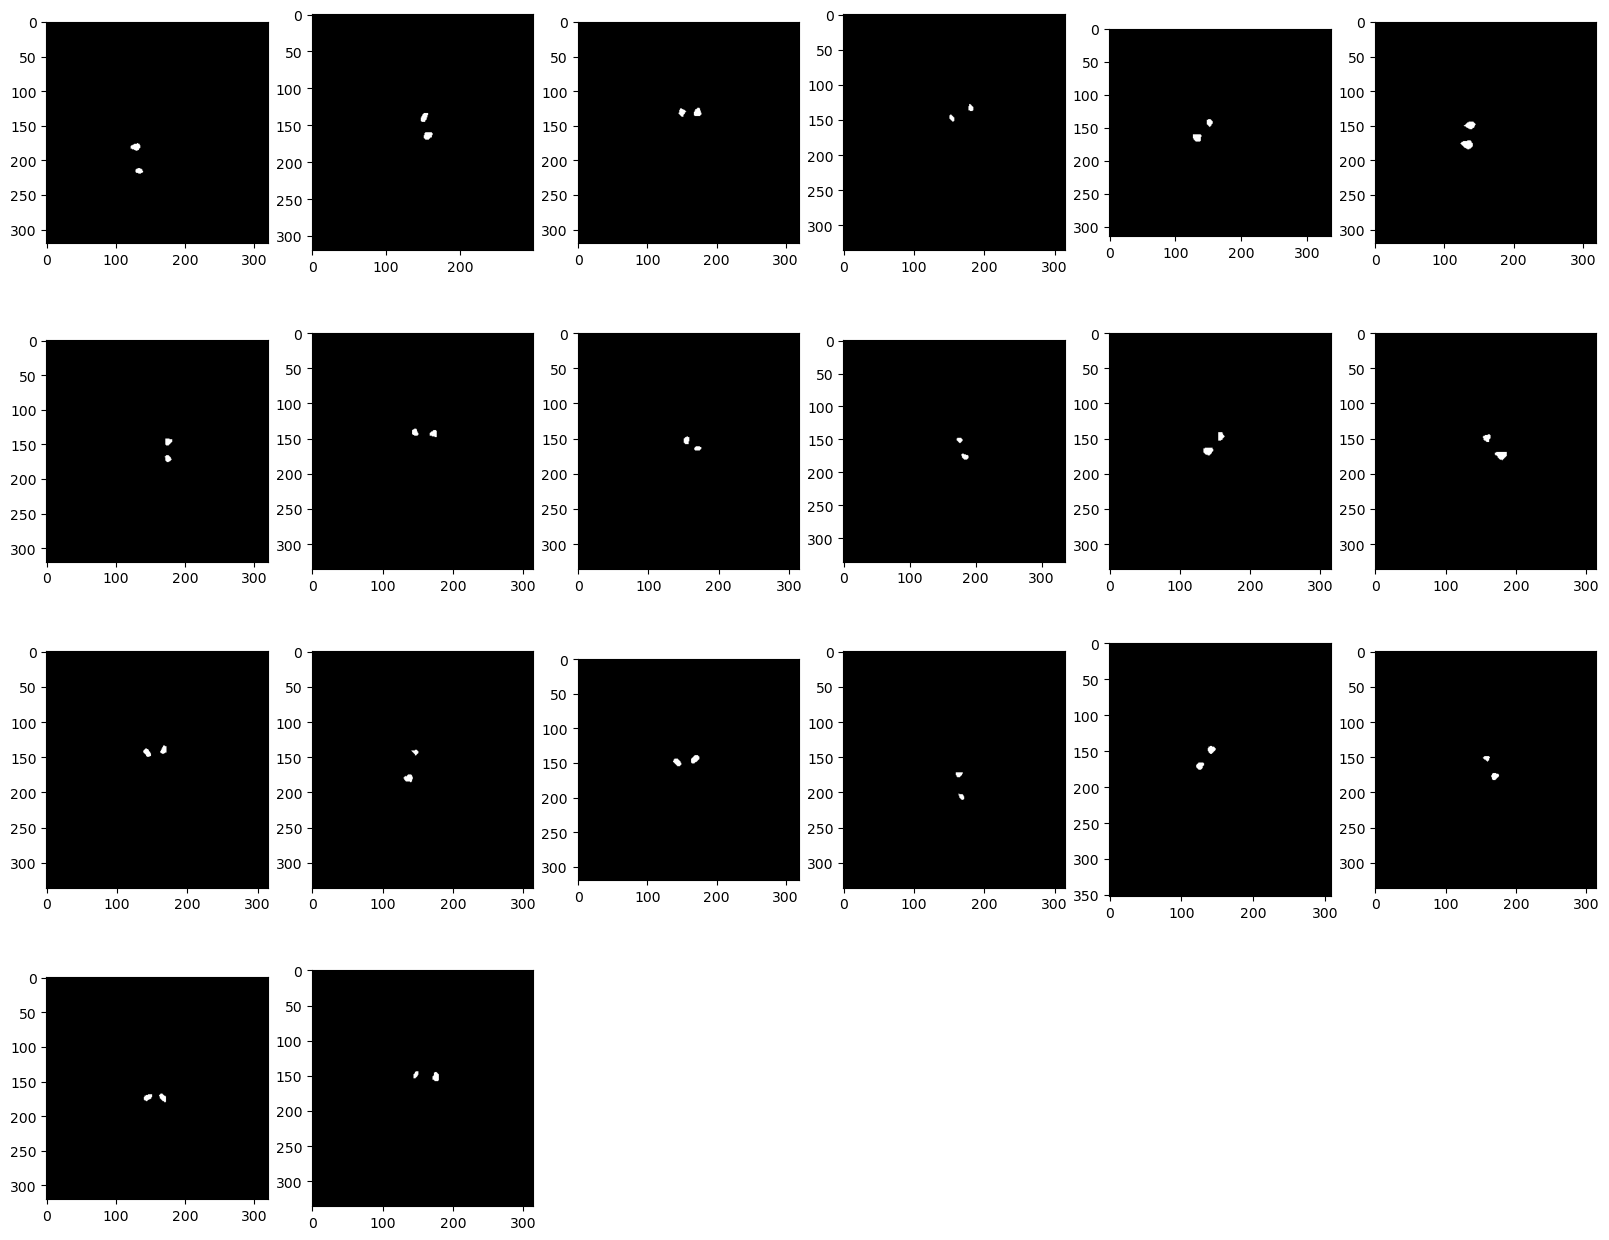

In [39]:
num=1
new_img = test1
plt.rcParams['figure.figsize'] = 20,20
for i in range(20):#也可以取10等
    # img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(ad_max_list[i],cmap='gray')
    num+=1
plt.show()

In [1]:
from scipy.ndimage import binary_erosion
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)

from common.axial_stand import AxialStand
axial_stand = AxialStand(image_files[0],label_files[0],"RAI")
img_norm_arr, msk_array, info = axial_stand.run_standlized()

max_area_idx_hc: 15 max_area_idx_csp: 17


In [2]:
info

{'img_info': {'size': (320, 320, 22),
  'org_origin': (-188.28005981445312, -118.37605285644531, -68.13616943359375),
  'origin': (110.78244018554688, 180.6864471435547, 15.863840579986572),
  'spacing': (0.9375, 0.9375, 4.000000476837158),
  'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)},
 'msk_info': {'size': (320, 320, 22),
  'org_origin': (-188.28005981445312, -118.37605285644531, -68.13616943359375),
  'origin': (110.78244018554688, 180.6864471435547, 15.863840579986572),
  'spacing': (0.9375, 0.9375, 4.000000476837158),
  'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)},
 'stand_info': {'methods': ['CSP_skeletonize', 'HC_ellipse', 'CSP_ellipse'],
  'ssim': [0.5803852528637782, 0.554121514450975, 0.4055217577585941],
  'angle_list': [95.36071014404297, 96.5309066772461, 93.40644375499473],
  'best_ids': 0,
  'cntr_list': [[160, 195], [149, 196], [148, 195]],
  'ellipses': [((148.16371154785156, 195.0547637939453),
    (94.35575866699219, 108.3

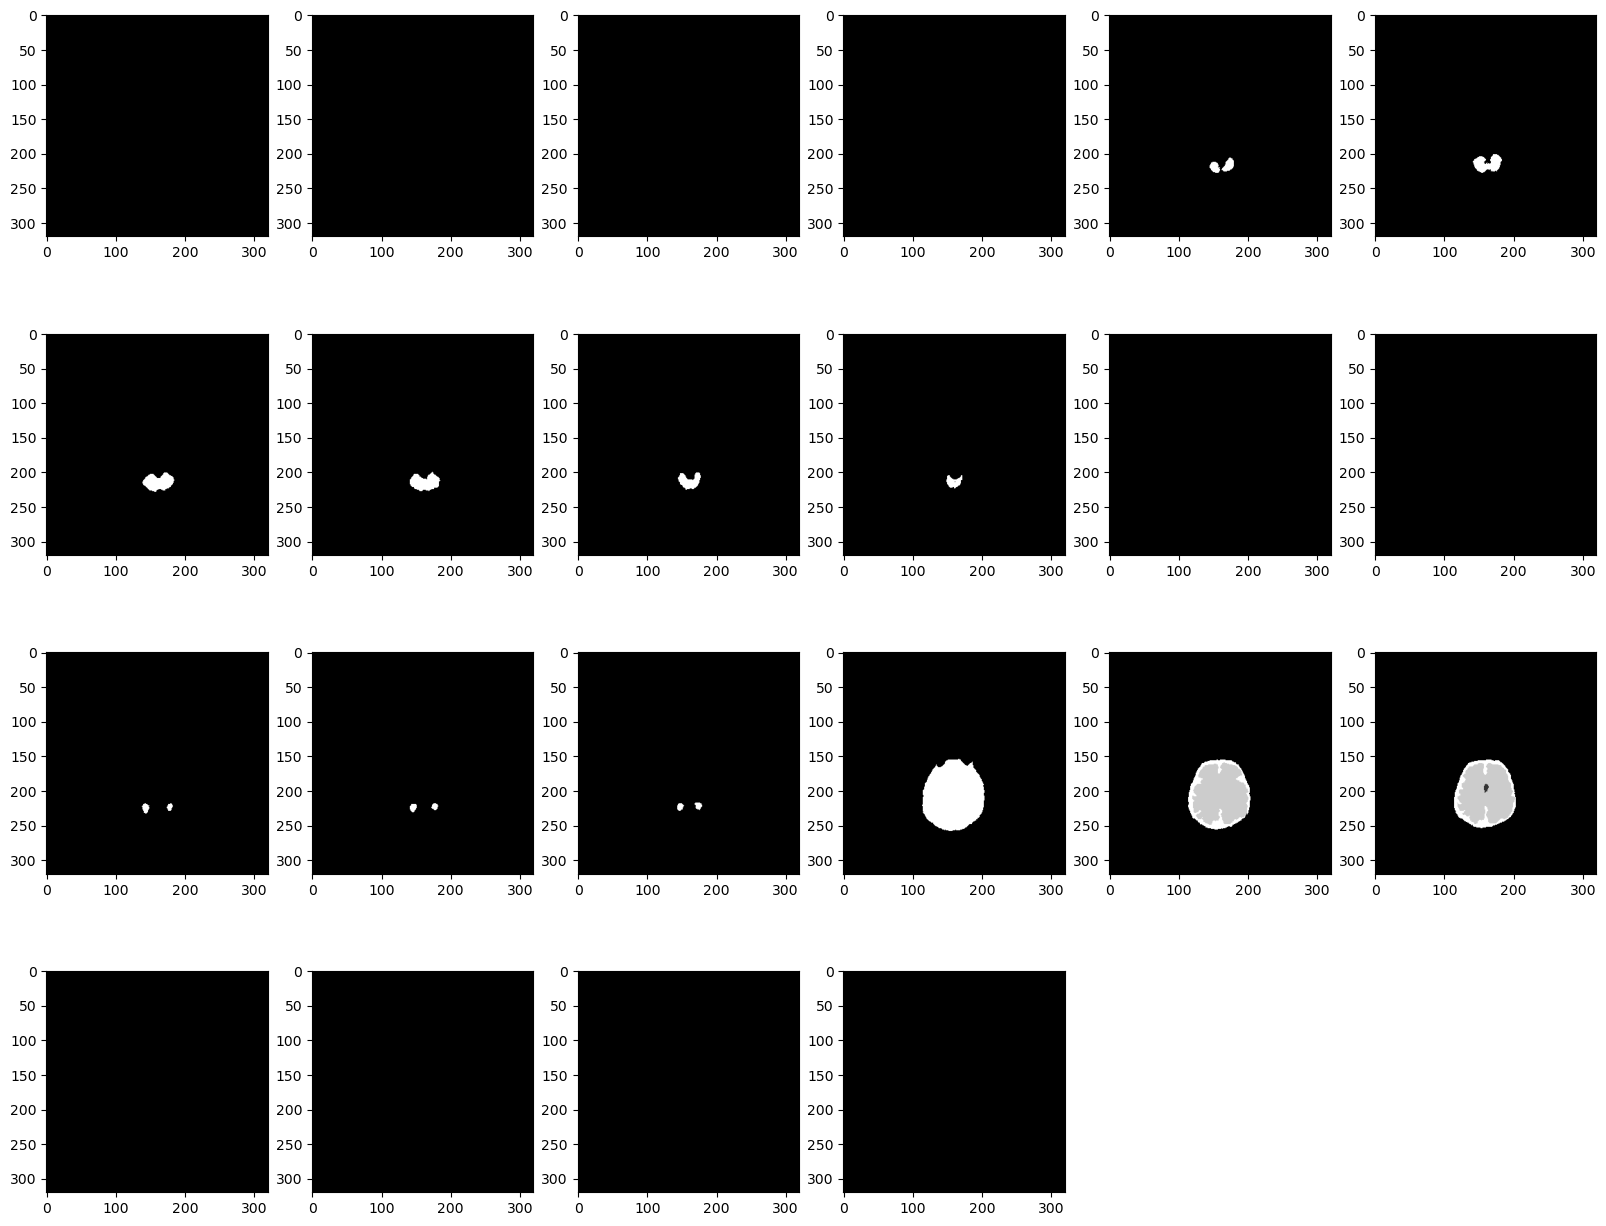

In [4]:
import matplotlib.pyplot as plt

num=1
new_img = msk_array
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

In [4]:
img_norm_arr.shape

AttributeError: 'list' object has no attribute 'shape'

In [47]:
from common.utils import get_cntr, euclidean_distance, get_cntr_form_slice, rotate_point, rotate_angle

img_norm_arr, msk_array = axial_stand.load_data(image_files[0],label_files[0],"RAI")

angle = axial_stand.get_angle_2D_multi_ssim(img_norm_arr, msk_array)
axial_stand.n_slices = img_norm_arr.shape[2]
# 根据小脑和透明隔腔的标签判断是否翻转
TCD_slice, _ = axial_stand.get_refer_max_slice(msk_array, 'TCD')
TCD_cntr = get_cntr_form_slice(TCD_slice)
CSP_cntr = axial_stand.stand_info['cntr_list'][2]

rotate_cntr = axial_stand.stand_info['rotate_cntr']

TCD_cntr_trans = rotate_point(TCD_cntr, rotate_cntr, angle, img_norm_arr.shape[1])
CSP_cntr_trans = rotate_point(CSP_cntr, rotate_cntr, angle, img_norm_arr.shape[1])

if CSP_cntr_trans[1] > TCD_cntr_trans[1]:
    angle_trans = angle
else:
    angle_trans = 180 + angle

axial_stand.stand_angle = angle_trans


img_std = np.zeros_like(img_norm_arr, dtype=np.uint8)
msk_std = np.zeros_like(msk_array, dtype=np.uint8)

for idx in range(axial_stand.n_slices):
    img_slice_norm = img_norm_arr[:, :, idx]
    msk_slice = msk_array[:, :, idx]

    img_slice_rotated = rotate_angle(img_slice_norm, angle_trans, rotate_cntr)
    classes = list(np.unique(msk_slice))
    msk_slice_rotated = np.zeros_like(msk_slice, dtype=np.uint8)

    for c in classes:
        n_mask_slice = np.where(msk_slice == c, 1, 0)
        n_mask_slice = n_mask_slice.astype(np.uint8)
        n_mask_slice = rotate_angle(n_mask_slice, angle_trans, rotate_cntr)
        msk_slice_rotated[n_mask_slice != 0] = c

    img_std[:, :, idx] = img_slice_rotated
    msk_std[:, :, idx] = msk_slice_rotated

max_area_idx_hc: 15 max_area_idx_csp: 17


In [48]:
msk_std.shape,angle,angle_trans

((320, 320, 22), 95.36071014404297, 275.36071014404297)

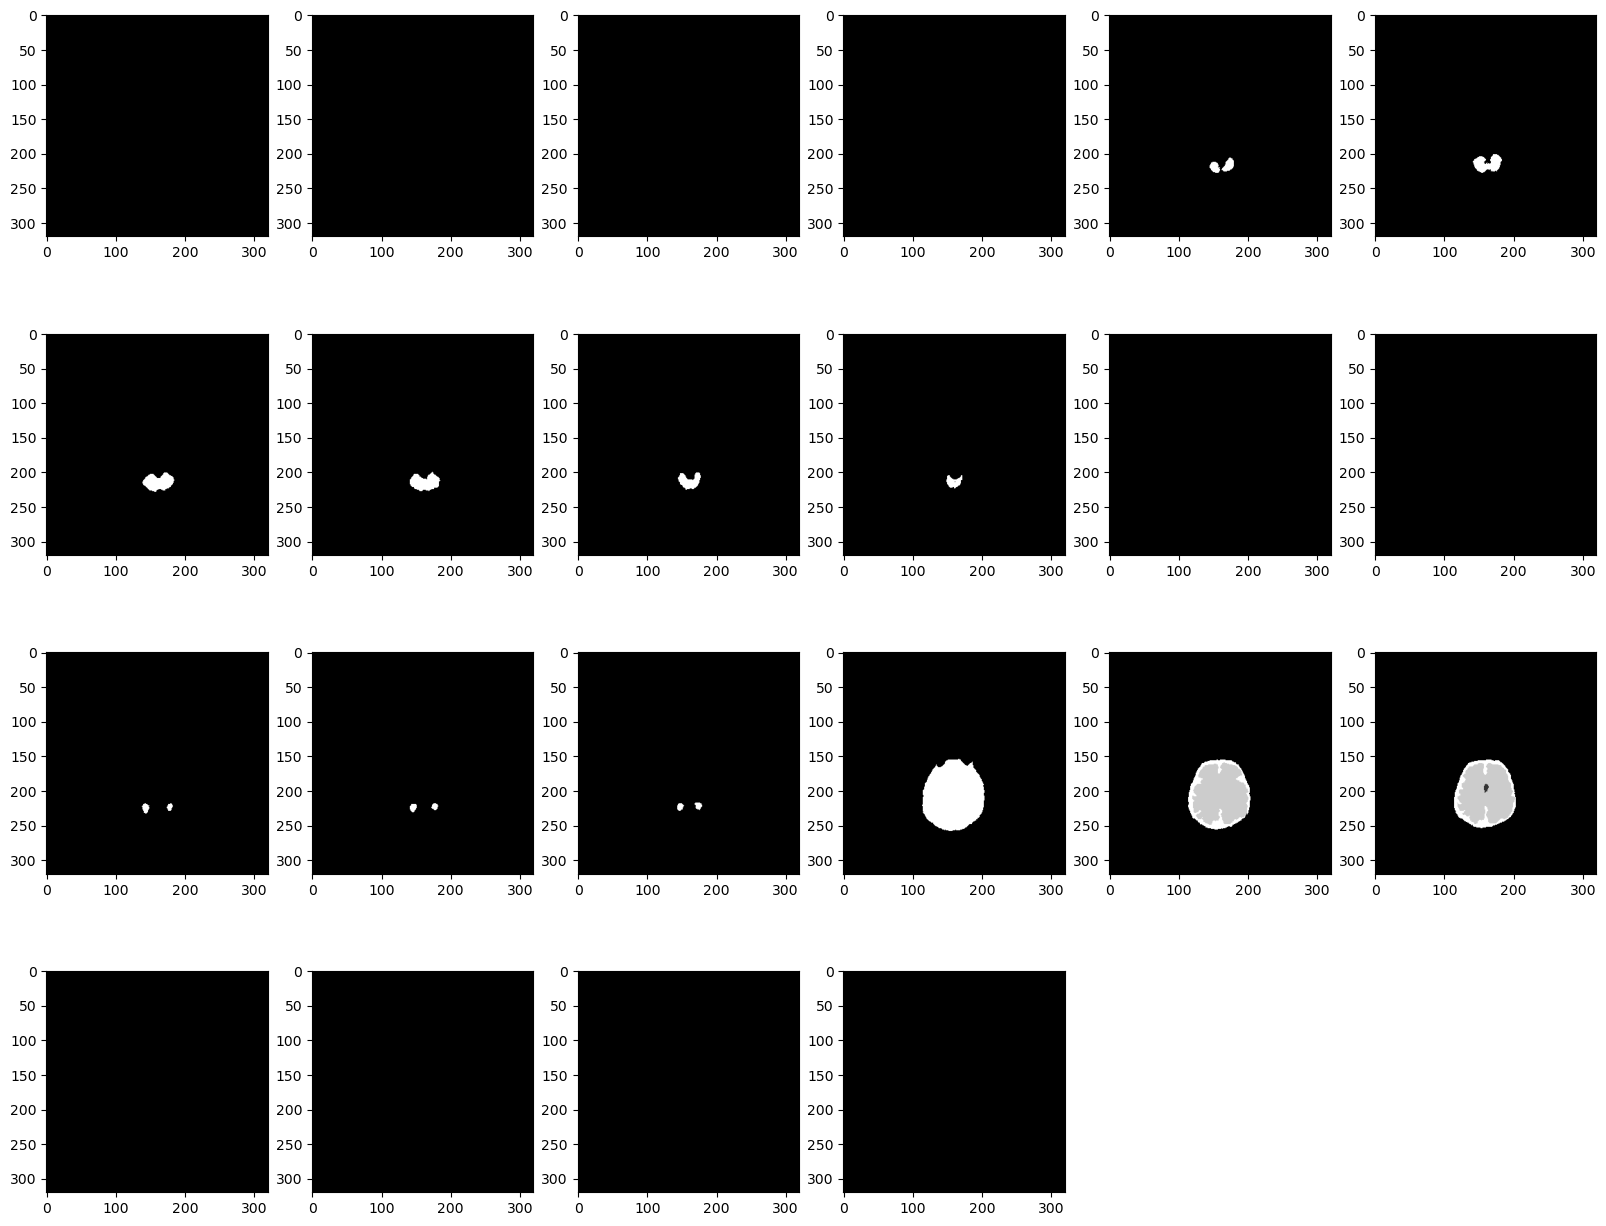

In [49]:
import matplotlib.pyplot as plt

num=1
new_img = msk_std
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

In [27]:
axial_stand.stand_info

{'methods': ['CSP_skeletonize', 'HC_ellipse', 'CSP_ellipse'],
 'ssim': [0.5803852528637782, 0.554121514450975, 0.4055217577585941],
 'angle_list': [95.36071014404297, 96.5309066772461, 93.40644375499473],
 'best_ids': 0,
 'cntr_list': [[160, 195], [149, 196], [148, 195]],
 'ellipses': [((148.16371154785156, 195.0547637939453),
   (94.35575866699219, 108.34178161621094),
   96.5309066772461),
  ((159.61915588378906, 194.57302856445312),
   (10.521628379821777, 17.581727981567383),
   95.36071014404297)],
 'fitline': [0.05952380952380954, 184.69047619047618],
 'rotate_cntr': [160, 195]}

In [28]:
angle_trans, -angle

(-95.36071014404297, -95.36071014404297)

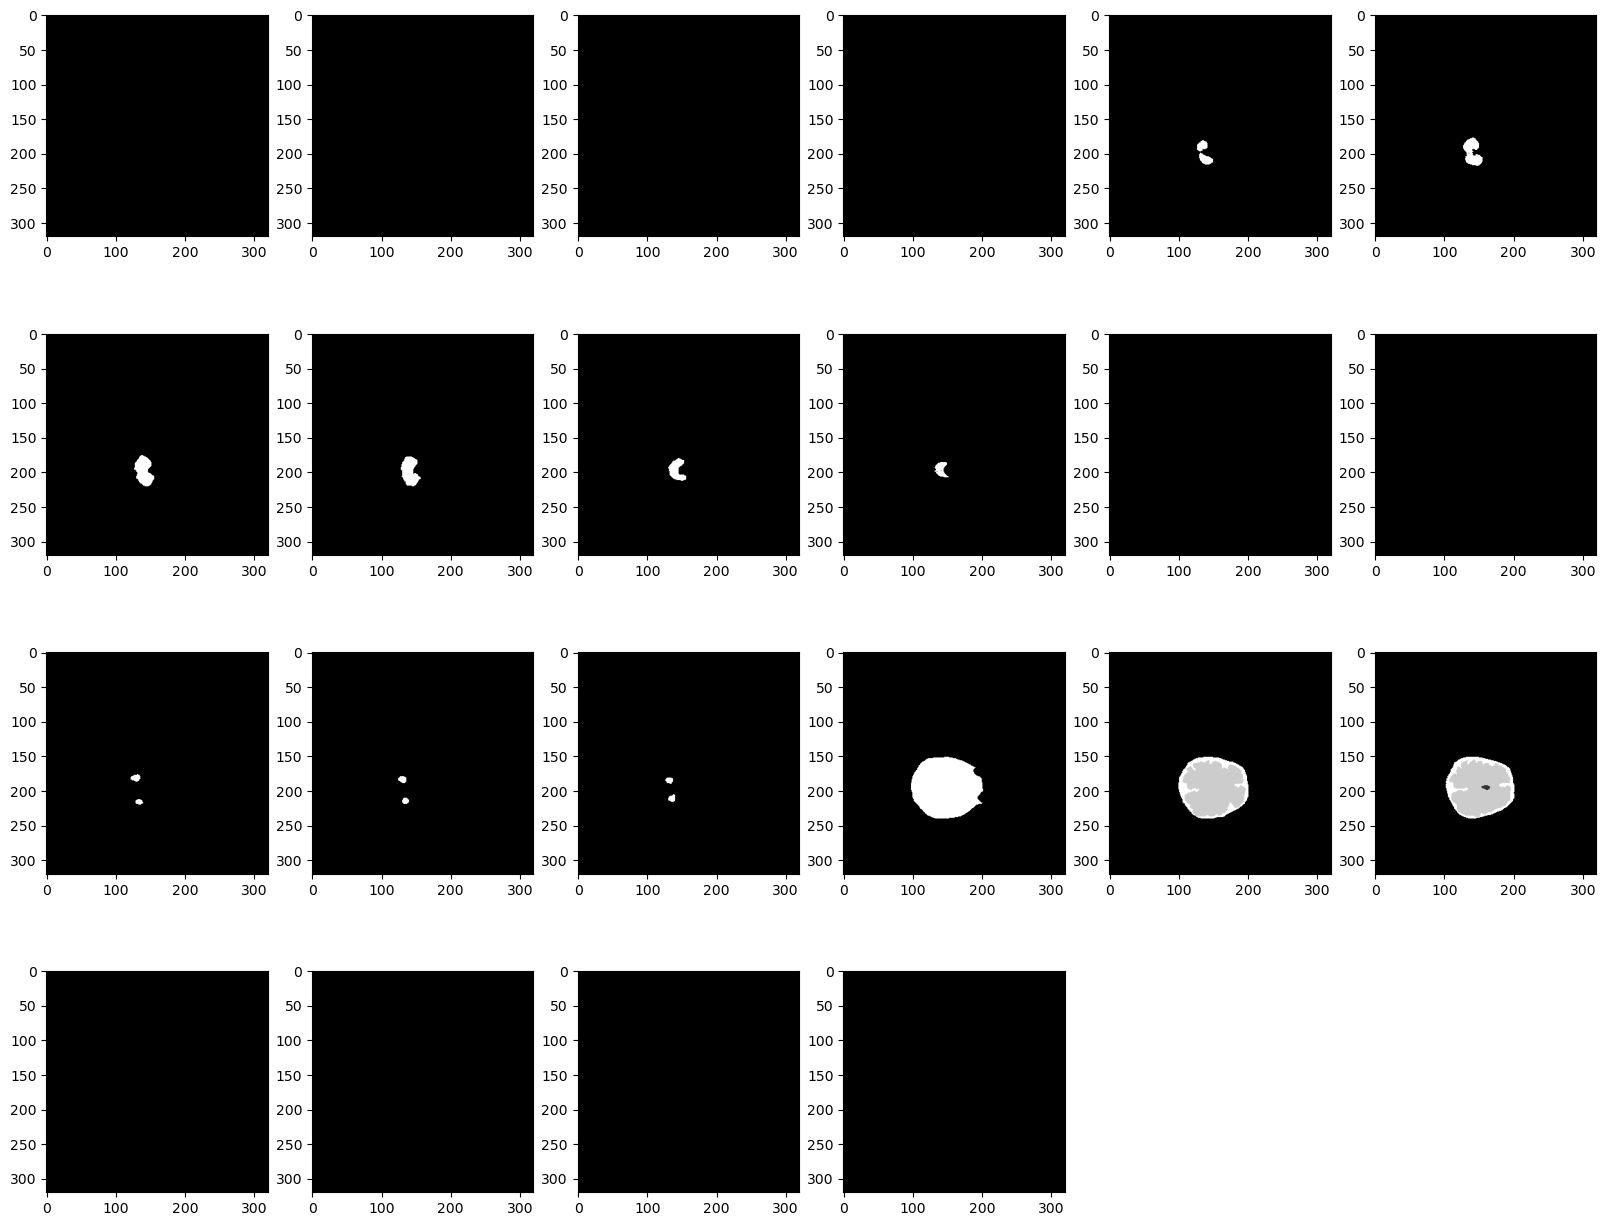

In [29]:
import matplotlib.pyplot as plt

num=1
new_img = msk_array
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

In [18]:
TCD_cntr_trans_1 = rotate_point(TCD_cntr, rotate_cntr, -angle, img_norm_arr.shape[1])
TCD_cntr_trans_2 = rotate_point(TCD_cntr, rotate_cntr, angle, img_norm_arr.shape[1])
TCD_cntr_trans_1,TCD_cntr_trans_2

((157, 175), (165, 213))

In [2]:
from scipy.ndimage import binary_erosion
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
from pathlib import Path
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)

from common.axial_stand import AxialStand
axial_stand = AxialStand(Path(image_files[0]),Path(label_files[0]),"RAI")
img_norm_arr, msk_array, info = axial_stand.run_standlized()

In [3]:
image_files[0].split('.')[1],image_files[0]

('/data2/img\\AI_XING_CHI_MR711087_664684831_2202_0000',
 './data2/img\\AI_XING_CHI_MR711087_664684831_2202_0000.nii.gz')

In [4]:
info,axial_stand.image_name

({'img_info': {'size': (320, 320, 22),
   'org_origin': (-188.28005981445312,
    -118.37605285644531,
    -68.13616943359375),
   'origin': (110.78244018554688, 180.6864471435547, 15.863840579986572),
   'spacing': (0.9375, 0.9375, 4.000000476837158),
   'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)},
  'msk_info': {'size': (320, 320, 22),
   'org_origin': (-188.28005981445312,
    -118.37605285644531,
    -68.13616943359375),
   'origin': (110.78244018554688, 180.6864471435547, 15.863840579986572),
   'spacing': (0.9375, 0.9375, 4.000000476837158),
   'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)},
  'stand_info': {'methods': ['CSP_skeletonize', 'HC_ellipse', 'CSP_ellipse'],
   'ssim': [0.5803852528637782, 0.554121514450975, 0.4055217577585941],
   'angle_list': [95.36071014404297, 96.5309066772461, 93.40644375499473],
   'best_ids': 0,
   'cntr_list': [[160, 195], [149, 196], [148, 195]],
   'ellipses': [((148.16371154785156, 195.0547637939453

In [6]:
from scipy.ndimage import binary_erosion
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)
import matplotlib.pyplot as plt
from common.axial_stand import AxialStand
from pathlib import Path


for idx in range(len(label_files)):
    axial_stand = AxialStand(Path(image_files[idx]),Path(label_files[idx]),"RAI")
    img_norm_arr, msk_array, info = axial_stand.run_standlized()
    img_slice = img_norm_arr[:,:,info['test_id']]
    msk_slice = msk_array[:,:,info['test_id']]
    
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))
    
    ax1.imshow(img_slice, cmap="gray")
    ax2.imshow(msk_slice, cmap="gray")
    plt.tight_layout()
    plt.savefig(f"./data2/Stand_test2/{axial_stand.image_name}.png")
    # plt.show()
    plt.close()



error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:708: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseDirect'


In [8]:
idx,axial_stand.image_name

(62, 'HOU_XIAO_HUA_MR721533_662604210_802_0000')

In [9]:
np.sum(msk_slice)

39880

In [12]:
from scipy.ndimage import binary_erosion
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
from pathlib import Path
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)

from common.axial_stand import AxialStand
axial_stand = AxialStand(Path(image_files[62]),Path(label_files[62]),"RAI")
# img_norm_arr, msk_array, info = axial_stand.run_standlized()
img_norm_arr, msk_array = axial_stand.load_data(axial_stand.image_path, axial_stand.mask_path, axial_stand.axcodes)
hc_slice_id, csp_slice_id = axial_stand.get_sliceID_contains_label(msk_array)
csp_slice = axial_stand.get_refer_slice(msk_array, 'CSP', csp_slice_id)
csp_slice.shape

(320, 320)

In [17]:
np.sum(csp_slice)

36

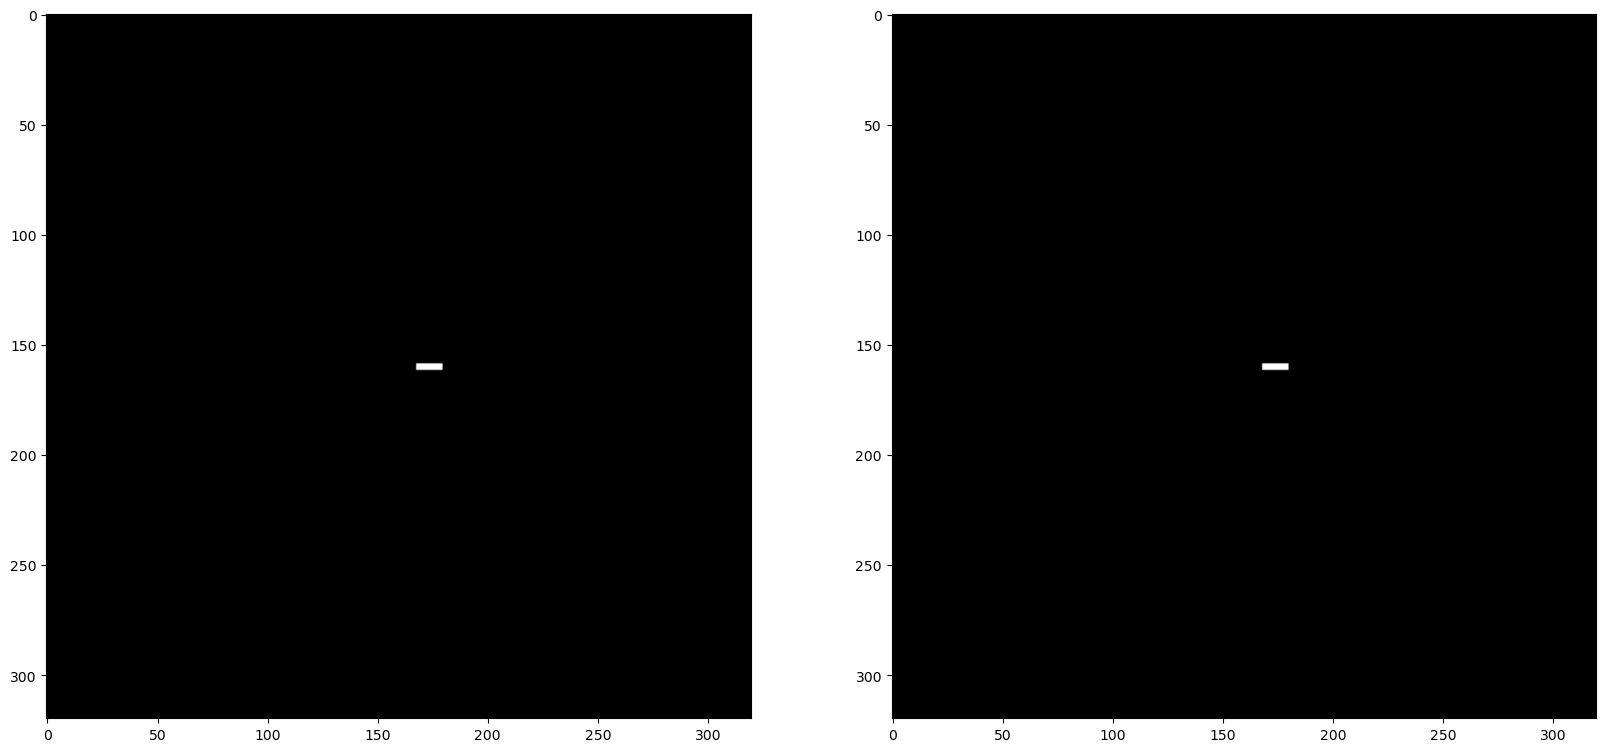

In [14]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(csp_slice, cmap="gray")
ax2.imshow(csp_slice, cmap="gray")


In [23]:
# np.set_printoptions(linewidth = 100000)
np.sum(csp_slice == 1)

36

In [24]:
np.unique(csp_slice)

array([0, 1], dtype=uint8)

In [26]:
mask = np.unique(csp_slice)

tmp = []

for v in mask:

    tmp.append(np.sum(csp_slice==v))

ts = np.max(tmp)

max_v = mask[np.argmax(tmp)]

In [28]:
max_v,ts

(0, 102364)

In [30]:
cnt = np.where(csp_slice != 0, 1, 0)
wt = np.sum(cnt) #统计白色像素占比
wt

36

In [31]:

# 设置卷积核
kernel = np.ones((3, 3), np.uint8)
# 进行图像膨胀
msk_slice = cv2.dilate(csp_slice, kernel, iterations=3)
# 腐蚀去噪
msk_slice = cv2.erode(msk_slice, kernel, iterations=1)
# 椭圆拟合
contours, hierarchy = cv2.findContours(msk_slice, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
area_contour = []
for k in range(len(contours)):
    area_contour.append(cv2.contourArea(contours[k]))
# use the largest mask
try:
    max_idx = np.argmax(np.array(area_contour))
except:
    max_idx = 0

In [32]:
contours

(array([[[166, 157]],
 
        [[166, 163]],
 
        [[181, 163]],
 
        [[181, 157]]], dtype=int32),)

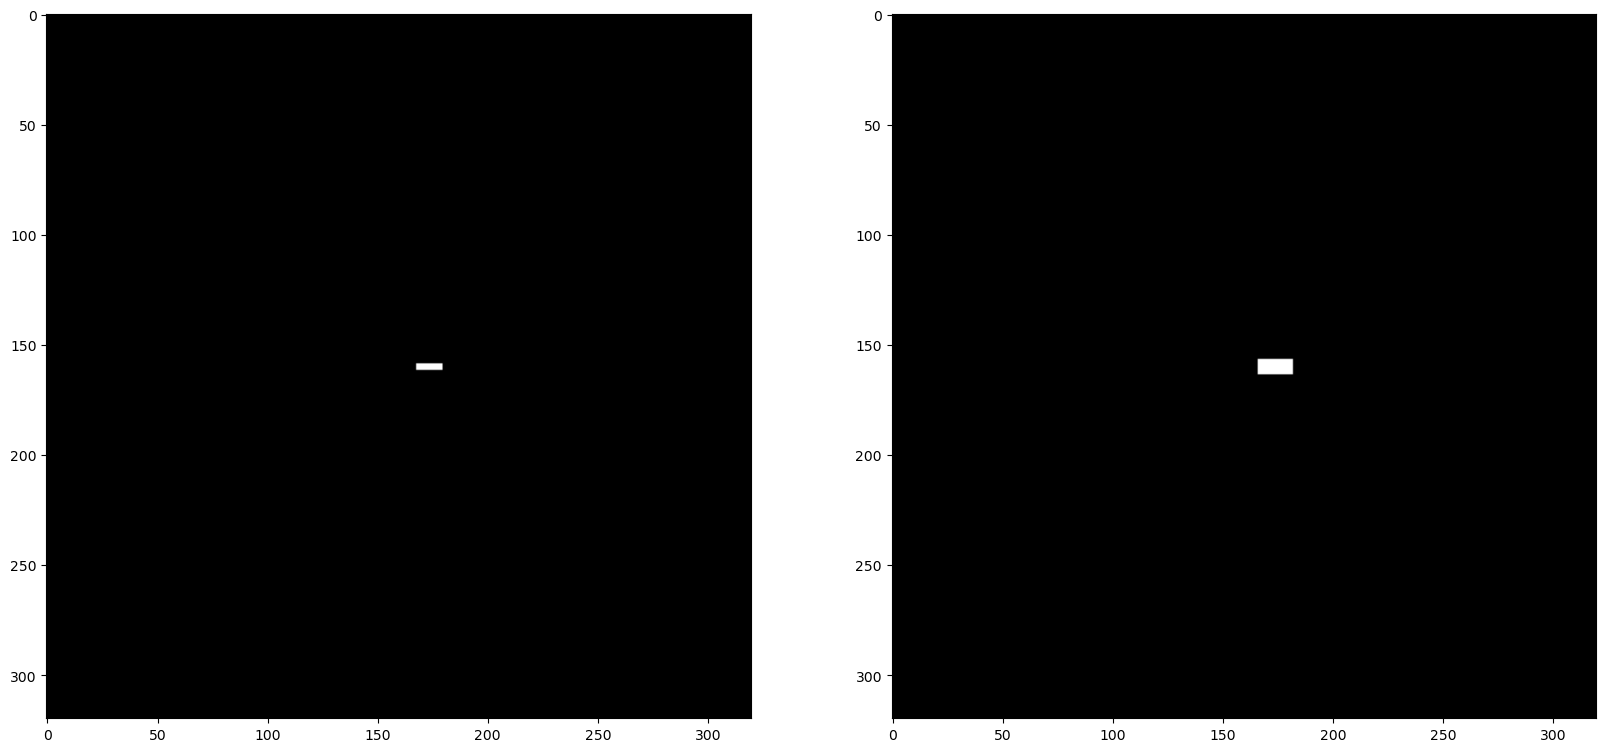

In [33]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(csp_slice, cmap="gray")
ax2.imshow(msk_slice, cmap="gray")

In [1]:
from scipy.ndimage import binary_erosion
from common.utils import get_cntr,euclidean_distance
import SimpleITK as sitk
import os
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage import morphology
from sklearn.linear_model import LinearRegression
import math
from batchgenerators.utilities.file_and_folder_operations import subfolders, subfiles, load_pickle
from pathlib import Path
label_folder='./data2/label'
image_folder = './data2/img'
label_files = subfiles(label_folder)
image_files = subfiles(image_folder)

from common.axial_stand import AxialStand
axial_stand = AxialStand(Path(image_files[1]),Path(label_files[1]),"RAI")
img_norm_arr, msk_array = axial_stand.load_data(axial_stand.image_path, axial_stand.mask_path, axial_stand.axcodes)
img_std, msk_std, info = axial_stand.run_standlized()
info

{'img_info': {'size': (300, 320, 24),
  'org_origin': (-35.1398811340332, -134.55258178710938, -227.4847412109375),
  'origin': (263.8601188659668, 184.44741821289062, -130.8847017288208),
  'spacing': (1.0, 1.0, 4.2000017166137695),
  'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
  'trans_direction': (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0)},
 'msk_info': {'size': (300, 320, 24),
  'org_origin': (-35.1398811340332, -134.55258178710938, -227.4847412109375),
  'origin': (263.8601188659668, 184.44741821289062, -130.8847017288208),
  'spacing': (1.0, 1.0, 4.2000017166137695),
  'origin_direction': (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
  'trans_direction': (-1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -1.0)},
 'stand_info': {'methods': ['CSP_skeletonize', 'HC_ellipse', 'CSP_ellipse'],
  'ssim': [0.49128769417510015, 0.5448067391660181, 0.41808813471314316],
  'angle_list': [86.56903839111328, 74.99430847167969, 85.10090754621224],
  'best_ids': 1,
  'cntr

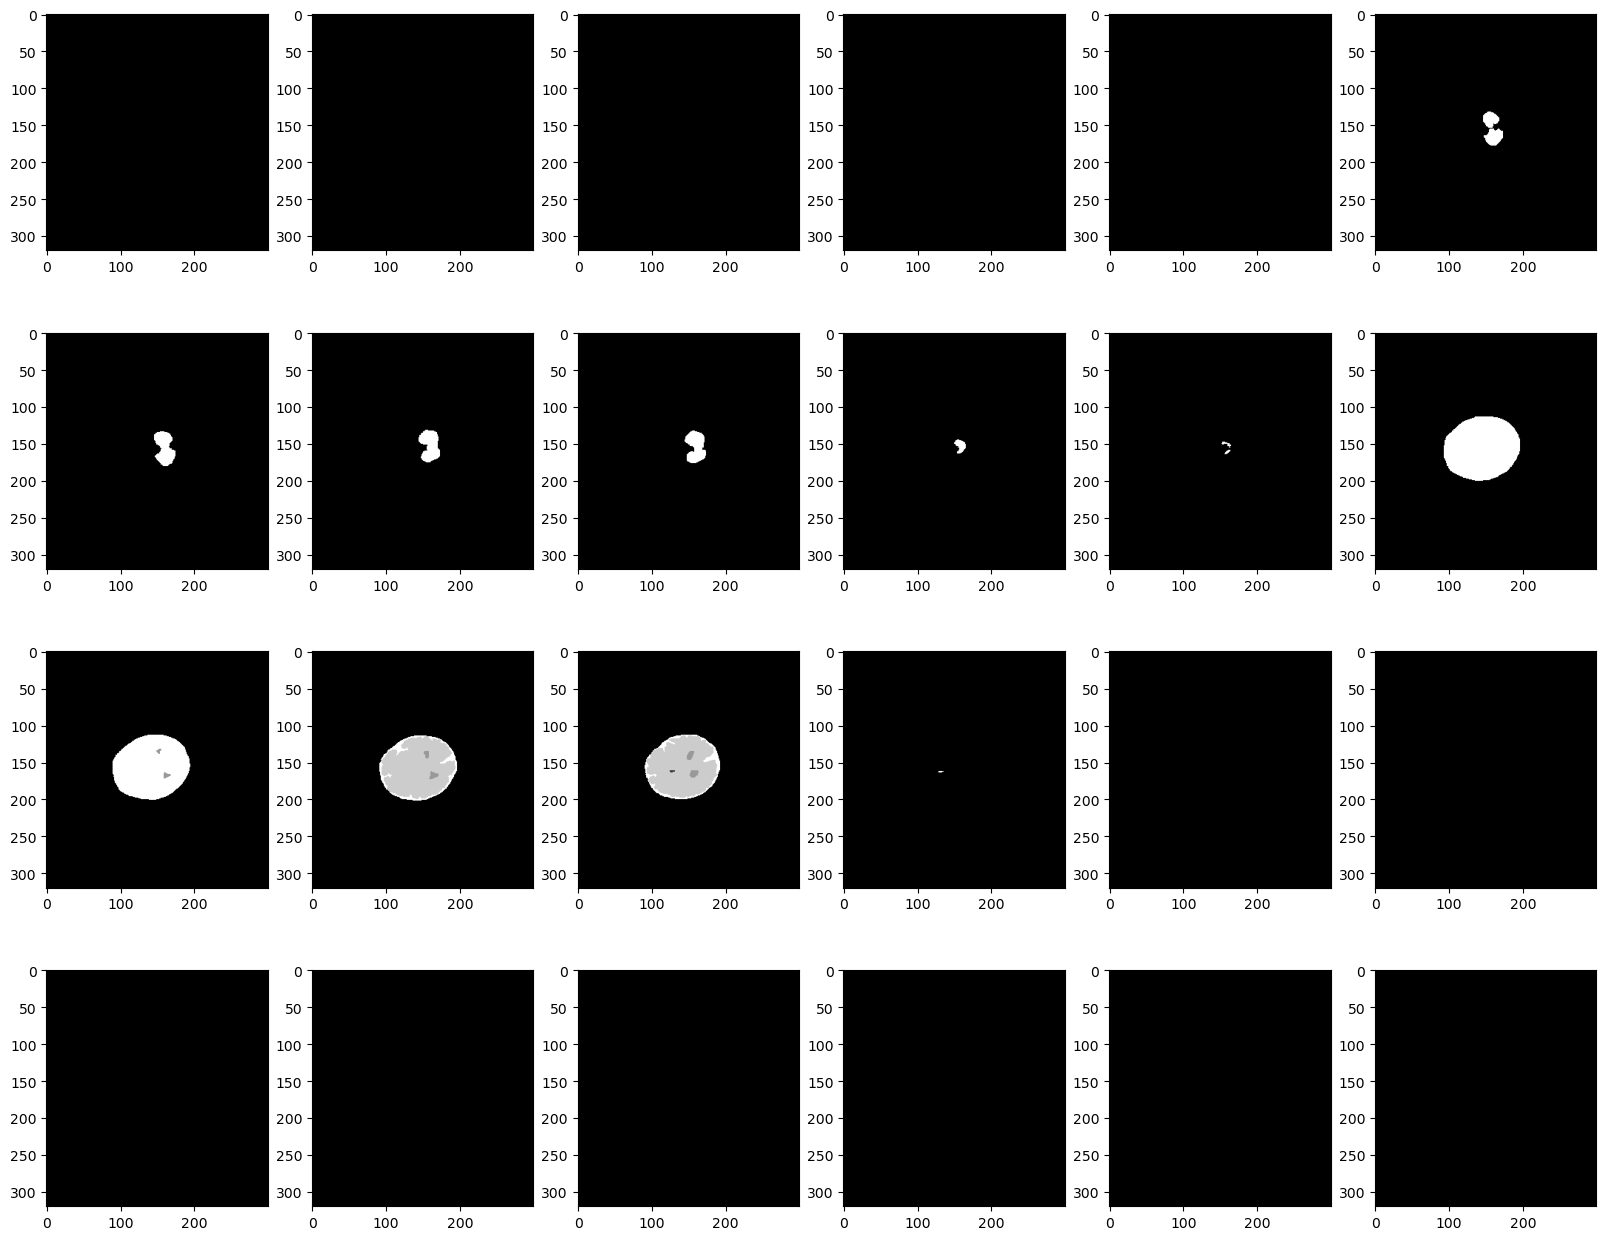

In [6]:
import matplotlib.pyplot as plt

num=1
new_img = msk_array
plt.rcParams['figure.figsize'] = 20,20
for i in range(new_img.shape[2]):#也可以取10等
    img_arr=new_img[:,:,i]
    plt.subplot(5,6,num)
    plt.imshow(img_arr,cmap='gray')
    num+=1
plt.show()

In [5]:
from common.utils import get_cntr, euclidean_distance, get_cntr_form_slice, rotate_point, rotate_angle

img_norm_arr, msk_array = axial_stand.load_data(image_files[1],label_files[1],"RAI")

angle = axial_stand.get_angle_2D_multi_ssim(img_norm_arr, msk_array)
axial_stand.n_slices = img_norm_arr.shape[2]
# 根据小脑和透明隔腔的标签判断是否翻转
TCD_slice, _ = axial_stand.get_refer_max_slice(msk_array, 'TCD')
TCD_cntr = get_cntr_form_slice(TCD_slice)
CSP_cntr = axial_stand.stand_info['cntr_list'][2]

rotate_cntr = axial_stand.stand_info['rotate_cntr']

TCD_cntr_trans = rotate_point(TCD_cntr, rotate_cntr, angle, img_norm_arr.shape[1])
CSP_cntr_trans = rotate_point(CSP_cntr, rotate_cntr, angle, img_norm_arr.shape[1])

if CSP_cntr_trans[1] > TCD_cntr_trans[1]:
    angle_trans = angle
else:
    angle_trans = 180 + angle

axial_stand.stand_angle = angle_trans


img_std = np.zeros_like(img_norm_arr, dtype=np.uint8)
msk_std = np.zeros_like(msk_array, dtype=np.uint8)

for idx in range(axial_stand.n_slices):
    img_slice_norm = img_norm_arr[:, :, idx]
    msk_slice = msk_array[:, :, idx]

    img_slice_rotated = rotate_angle(img_slice_norm, -90 - angle_trans, rotate_cntr)
    classes = list(np.unique(msk_slice))
    msk_slice_rotated = np.zeros_like(msk_slice, dtype=np.uint8)

    for c in classes:
        n_mask_slice = np.where(msk_slice == c, 1, 0)
        n_mask_slice = n_mask_slice.astype(np.uint8)
        n_mask_slice = rotate_angle(n_mask_slice, -90-angle_trans, rotate_cntr)
        msk_slice_rotated[n_mask_slice != 0] = c

    img_std[:, :, idx] = img_slice_rotated
    msk_std[:, :, idx] = msk_slice_rotated

In [6]:
angle,angle_trans

(74.99430847167969, 74.99430847167969)

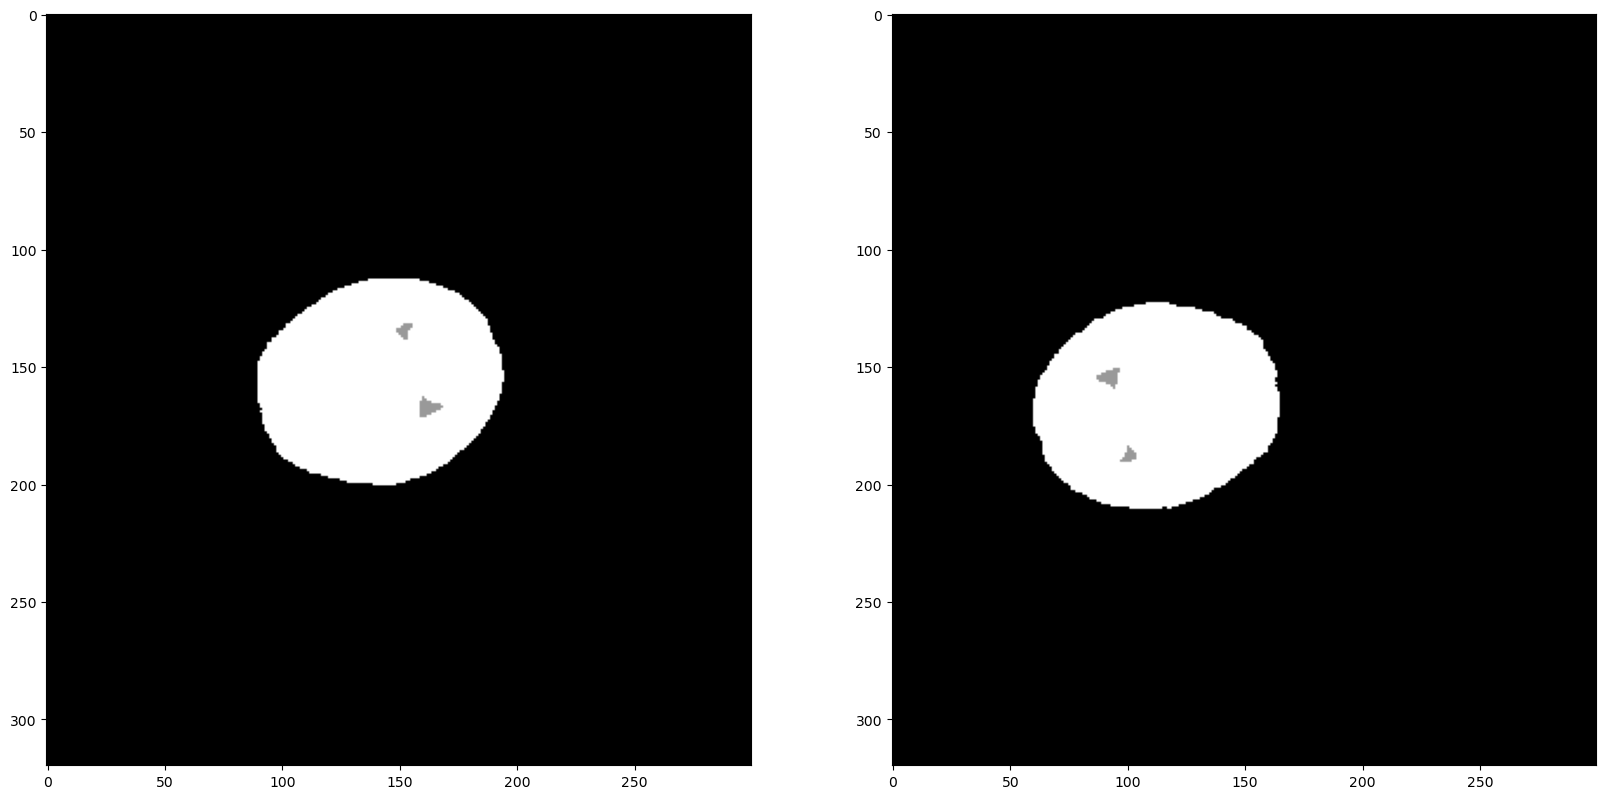

In [54]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(msk_array[:,:,12], cmap="gray")
ax2.imshow(msk_std[:,:,12], cmap="gray")

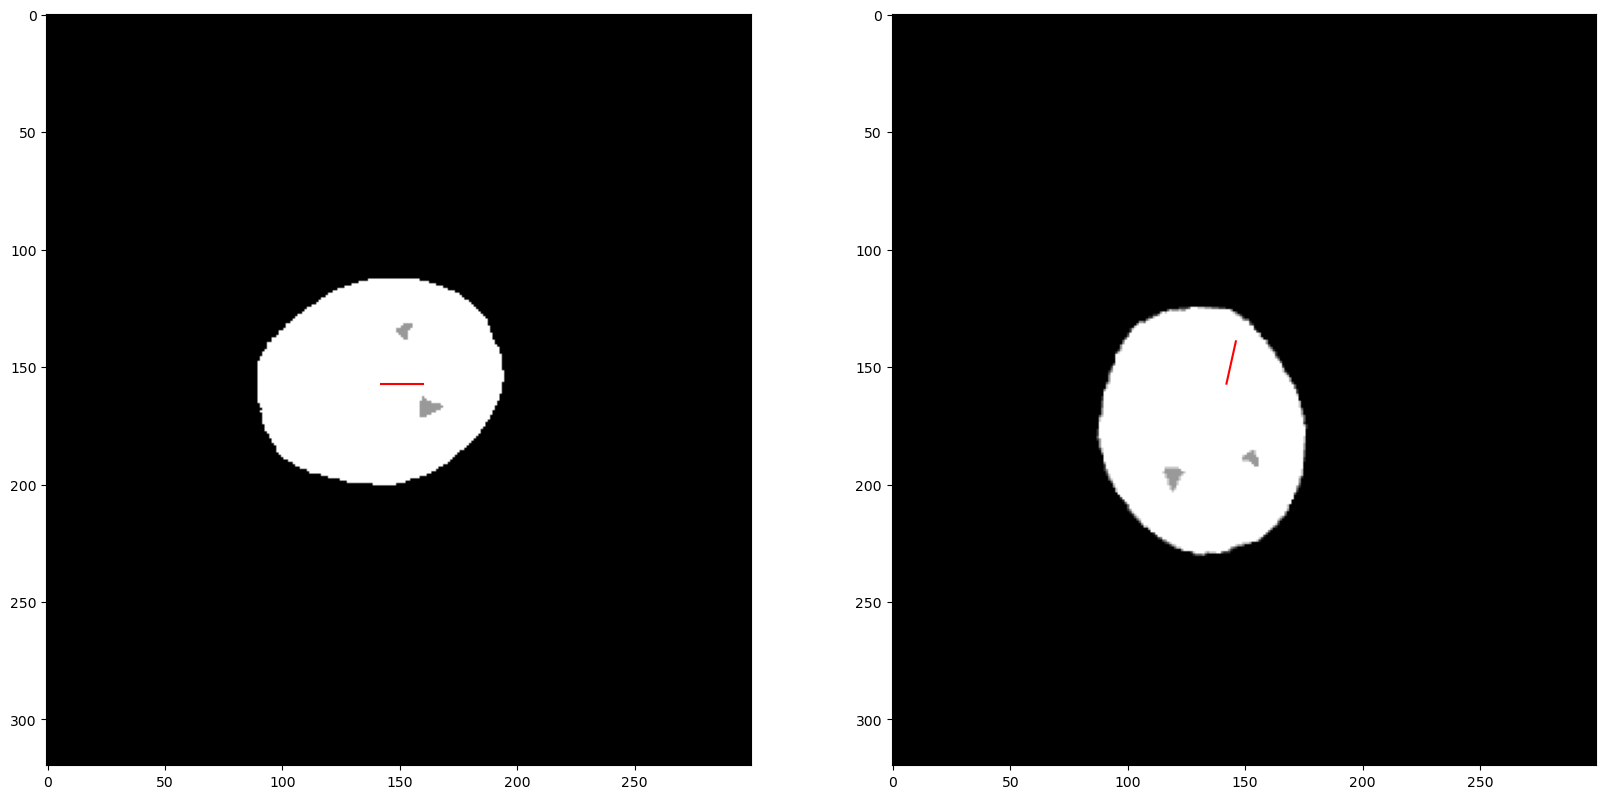

In [7]:
cntr = [127,162]
img= msk_array[:,:,12]
rows, cols = img.shape[0], img.shape[1]
M = cv2.getRotationMatrix2D(cntr, -(180-86), 1)
img_rot = cv2.warpAffine(img, M, (cols, rows))

import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(img, cmap="gray")
ax1.plot([160,142],[157,157], color="red")
ax2.imshow(img_rot, cmap="gray")
ax2.plot([146,142],[139,157], color="red")